In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
dtypes = {
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [4]:
proc = ['Wdft_RegionIdentifier', 'Wdft_IsGamer', 'UacLuaenable', 'SMode', 'RtpStateBitfield', 'OsBuildLab', 'IsProtected', 'IeVerIdentifier','GeoNameIdentifier', 'OsBuildLab','IsProtected','Firewall','CityIdentifier','Census_ProcessorModelIdentifier','Census_ProcessorManufacturerIdentifier','Census_OSInstallLanguageIdentifier','Census_OEMNameIdentifier','Census_IsVirtualDevice','Census_OEMModelIdentifier','Census_IsFlightsDisabled','Census_IsAlwaysOnAlwaysConnectedCapable','Census_FirmwareVersionIdentifier','Census_FirmwareManufacturerIdentifier','AVProductStatesIdentifier','AVProductsEnabled','AVProductsInstalled']
proc = list(set(proc))
print (len(proc))

24


In [8]:
%%time
temp = pd.read_csv('train.csv.zip', nrows=2)
columns = temp.columns.tolist()
columns.remove('MachineIdentifier')
train = pd.read_csv('train.csv.zip', dtype=dtypes, usecols=columns)

CPU times: user 2min 8s, sys: 5.51 s, total: 2min 14s
Wall time: 2min 12s


In [9]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [10]:
%%time
#aux = train.copy()
#train = aux.copy()
encoders = {}
for col in proc:
    print (f'Processing {col}')
    le = LabelEncoder()
    train[col] = train[col].astype('str')
    u_bef = train[col].unique().shape
    print (f'Uniques before transformation {u_bef}')
    le.fit(train[col])
    encoders[col] = le
    train[col] = le.transform(train[col])
    u_aft = train[col].unique().shape
    print (f'Uniques after transformation {u_aft}')
    print (f'Processed {col}')

Processing Census_OEMModelIdentifier
Uniques before transformation (175366,)
Uniques after transformation (175366,)
Processed Census_OEMModelIdentifier
Processing SMode
Uniques before transformation (3,)
Uniques after transformation (3,)
Processed SMode
Processing Census_OEMNameIdentifier
Uniques before transformation (2565,)
Uniques after transformation (2565,)
Processed Census_OEMNameIdentifier
Processing GeoNameIdentifier
Uniques before transformation (293,)
Uniques after transformation (293,)
Processed GeoNameIdentifier
Processing CityIdentifier
Uniques before transformation (107367,)
Uniques after transformation (107367,)
Processed CityIdentifier
Processing Census_IsAlwaysOnAlwaysConnectedCapable
Uniques before transformation (3,)
Uniques after transformation (3,)
Processed Census_IsAlwaysOnAlwaysConnectedCapable
Processing Census_FirmwareVersionIdentifier
Uniques before transformation (50495,)
Uniques after transformation (50495,)
Processed Census_FirmwareVersionIdentifier
Proces

In [11]:
import gc
gc.collect()

220892

In [12]:
%%time
for col in proc:
    print (f'Processing {col}')
    u_bef = train[col].unique().shape
    print (f'Uniques before transformation {u_bef}')
    ## Data types converstion
    if u_bef[0] < np.iinfo('int8').max:
        train[col] = train[col].astype('int8')
    elif u_bef[0] < np.iinfo('int16').max:
        train[col] = train[col].astype('int16')
    elif u_bef[0] < np.iinfo('int32').max:
        train[col] = train[col].astype('int32')
    else:
        train[col] = train[col].astype('int64')
    u_aft = train[col].unique().shape
    print (f'Uniques after transformation {u_aft}')
    print (f'Processed {col}')

Processing Census_OEMModelIdentifier
Uniques before transformation (175366,)
Uniques after transformation (175366,)
Processed Census_OEMModelIdentifier
Processing SMode
Uniques before transformation (3,)
Uniques after transformation (3,)
Processed SMode
Processing Census_OEMNameIdentifier
Uniques before transformation (2565,)
Uniques after transformation (2565,)
Processed Census_OEMNameIdentifier
Processing GeoNameIdentifier
Uniques before transformation (293,)
Uniques after transformation (293,)
Processed GeoNameIdentifier
Processing CityIdentifier
Uniques before transformation (107367,)
Uniques after transformation (107367,)
Processed CityIdentifier
Processing Census_IsAlwaysOnAlwaysConnectedCapable
Uniques before transformation (3,)
Uniques after transformation (3,)
Processed Census_IsAlwaysOnAlwaysConnectedCapable
Processing Census_FirmwareVersionIdentifier
Uniques before transformation (50495,)
Uniques after transformation (50495,)
Processed Census_FirmwareVersionIdentifier
Proces

In [13]:
train.drop(axis=1, columns=["Census_IsWIMBootEnabled","Census_InternalBatteryType","Census_IsFlightingInternal","Census_ProcessorClass","Census_ThresholdOptIn","DefaultBrowsersIdentifier","OrganizationIdentifier","PuaMode","SmartScreen", "IsBeta"], inplace=True)

In [14]:
other = {}

train["Census_PrimaryDiskTypeName"] = train.Census_PrimaryDiskTypeName.str.replace('Unspecified', 'UNKNOWN')
train.Census_PrimaryDiskTypeName.fillna("UNKNOWN", inplace=True)
le = LabelEncoder()
train['Census_PrimaryDiskTypeName'] = train.Census_PrimaryDiskTypeName.astype('str')
u_bfr = train['Census_PrimaryDiskTypeName'].unique().shape
print (f'Before {u_bfr}')
le.fit(train['Census_PrimaryDiskTypeName'])
train['Census_PrimaryDiskTypeName'] = le.transform(train['Census_PrimaryDiskTypeName'])
train['Census_PrimaryDiskTypeName'] = train.Census_PrimaryDiskTypeName.astype('int8')
u_aftr = train['Census_PrimaryDiskTypeName'].unique().shape
print (f'After {u_aftr}')
other['Census_PrimaryDiskTypeName'] = le

train["Census_PowerPlatformRoleName"] = train.Census_PowerPlatformRoleName.str.replace('Unspecified', 'UNKNOWN')
train.Census_PowerPlatformRoleName.fillna("UNKNOWN", inplace=True)
le = LabelEncoder()
train['Census_PowerPlatformRoleName'] = train.Census_PowerPlatformRoleName.astype('str')
u_bfr = train['Census_PowerPlatformRoleName'].unique().shape
print (f'Before {u_bfr}')
le.fit(train['Census_PowerPlatformRoleName'])
train['Census_PowerPlatformRoleName'] = le.transform(train['Census_PowerPlatformRoleName'])
train['Census_PowerPlatformRoleName'] = train.Census_PowerPlatformRoleName.astype('int8')
u_aftr = train['Census_PowerPlatformRoleName'].unique().shape
print (f'After {u_aftr}')
other['Census_PowerPlatformRoleName'] = le

import re
exp = re.compile('[0-9]+')

train["Census_ChassisTypeName"] = train.Census_ChassisTypeName.str.replace(exp, 'Unknown')
train["Census_ChassisTypeName"] = train.Census_ChassisTypeName.str.replace('Other', 'Unknown')
train["Census_ChassisTypeName"] = train.Census_ChassisTypeName.str.replace('UNKNOWN', 'Unknown')
train.Census_ChassisTypeName.fillna('Unknown', inplace=True)

le = LabelEncoder()
train['Census_ChassisTypeName'] = train.Census_ChassisTypeName.astype('str')
u_bfr = train['Census_ChassisTypeName'].unique().shape
print (f'Before {u_bfr}')
le.fit(train['Census_ChassisTypeName'])
train['Census_ChassisTypeName'] = le.transform(train['Census_ChassisTypeName'])
train['Census_ChassisTypeName'] = train.Census_ChassisTypeName.astype('int8')
u_aftr = train['Census_ChassisTypeName'].unique().shape
print (f'After {u_aftr}')
other['Census_ChassisTypeName'] = le

Before (3,)
After (3,)
Before (9,)
After (9,)
Before (32,)
After (32,)


In [15]:
true_numerical_columns = [
    'Census_ProcessorCoreCount',
    'Census_PrimaryDiskTotalCapacity',
    'Census_SystemVolumeTotalCapacity',
    'Census_TotalPhysicalRAM',
    'Census_InternalPrimaryDiagonalDisplaySizeInInches',
    'Census_InternalPrimaryDisplayResolutionHorizontal',
    'Census_InternalPrimaryDisplayResolutionVertical',
    'Census_InternalBatteryNumberOfCharges'
]

In [16]:
train.Census_PrimaryDiskTotalCapacity.fillna(3089054.5, inplace=True)
train.Census_SystemVolumeTotalCapacity.fillna(377368.25, inplace=True)
train.Census_TotalPhysicalRAM.fillna(6115.266, inplace=True)
train.Census_InternalPrimaryDisplayResolutionVertical.fillna(897.5707, inplace=True)
train.Census_InternalPrimaryDiagonalDisplaySizeInInches.fillna(16.6760, inplace=True)
train.Census_InternalPrimaryDisplayResolutionHorizontal.fillna(1547.716, inplace=True)
train.Census_InternalBatteryNumberOfCharges.fillna(0.0, inplace=True)

In [17]:
le = LabelEncoder()
train['Census_ProcessorCoreCount'] = train.Census_ProcessorCoreCount.astype('str')
u_bfr = train['Census_ProcessorCoreCount'].unique().shape
print (f'Before {u_bfr}')
le.fit(train['Census_ProcessorCoreCount'])
train['Census_ProcessorCoreCount'] = le.transform(train['Census_ProcessorCoreCount'])
u_aftr = train['Census_ProcessorCoreCount'].unique().shape
print (f'After {u_aftr}')
other['Census_ProcessorCoreCount'] = le

Before (46,)
After (46,)


In [18]:
train['Census_ProcessorCoreCount'] = train['Census_ProcessorCoreCount'].astype('int8') 

In [19]:
dropped_cols=["Census_IsWIMBootEnabled","Census_InternalBatteryType","Census_IsFlightingInternal","Census_ProcessorClass","Census_ThresholdOptIn","DefaultBrowsersIdentifier","OrganizationIdentifier","PuaMode","SmartScreen", "IsBeta"]
dropped_cols = list(set(dropped_cols))
print (len(dropped_cols))

10


In [20]:
all_processed =  list(proc) + list(other.keys()) + true_numerical_columns
all_processed = list (set (all_processed))
print (len(all_processed))

35


In [21]:
rest = list(set(train.columns.tolist()).difference(set(all_processed)))
rest = list (set (rest))
print (len (rest))

37


In [22]:
display_all(train[rest].dtypes)

Platform                            category
Census_OSVersion                    category
Census_HasOpticalDiskDrive              int8
Census_IsPenCapable                     int8
ProductName                         category
Census_GenuineStateName             category
AppVersion                          category
EngineVersion                       category
SkuEdition                          category
OsPlatformSubRelease                category
LocaleEnglishNameIdentifier             int8
IsSxsPassiveMode                        int8
Census_OSBranch                     category
OsBuild                                int16
Census_ActivationChannel            category
AutoSampleOptIn                         int8
Census_OSBuildRevision                 int32
Census_OSInstallTypeName            category
Census_IsSecureBootEnabled              int8
HasTpm                                  int8
AvSigVersion                        category
Census_IsTouchEnabled                   int8
Census_OSS

In [23]:
rest_categories = train[rest].select_dtypes(include=['category']).columns.tolist()
rest_numbers = train[rest].select_dtypes(exclude=['category']).columns.tolist()

In [24]:
print (len(rest_categories))
print (len(rest_numbers))

21
16


In [25]:
%%time
rest_categories_encoders = {}

for col in rest_categories:
    print (f'Processing {col}') 
    le = LabelEncoder()
    train[col] = train[col].astype('str')
    u_bef = train[col].unique().shape    
    print (f'Uniques before transformation {u_bef}')
    le.fit(train[col])
    rest_categories_encoders[col] = le
    train[col] = le.transform(train[col])
    u_aft = train[col].unique().shape
    print (f'Uniques after transformation {u_aft}')
    print (f'Processed {col}')

Processing Platform
Uniques before transformation (4,)
Uniques after transformation (4,)
Processed Platform
Processing Census_OSVersion
Uniques before transformation (469,)
Uniques after transformation (469,)
Processed Census_OSVersion
Processing ProductName
Uniques before transformation (6,)
Uniques after transformation (6,)
Processed ProductName
Processing Census_GenuineStateName
Uniques before transformation (5,)
Uniques after transformation (5,)
Processed Census_GenuineStateName
Processing AppVersion
Uniques before transformation (110,)
Uniques after transformation (110,)
Processed AppVersion
Processing EngineVersion
Uniques before transformation (70,)
Uniques after transformation (70,)
Processed EngineVersion
Processing SkuEdition
Uniques before transformation (8,)
Uniques after transformation (8,)
Processed SkuEdition
Processing OsPlatformSubRelease
Uniques before transformation (9,)
Uniques after transformation (9,)
Processed OsPlatformSubRelease
Processing Census_OSBranch
Uniqu

In [26]:
%%time
for col in rest_categories:
    print (f'Processing {col}')
    u_bef = train[col].unique().shape
    print (f'Uniques before transformation {u_bef}')
    ## Data types converstion
    if u_bef[0] < np.iinfo('int8').max:
        train[col] = train[col].astype('int8')
    elif u_bef[0] < np.iinfo('int16').max:
        train[col] = train[col].astype('int16')
    elif u_bef[0] < np.iinfo('int32').max:
        train[col] = train[col].astype('int32')
    else:
        train[col] = train[col].astype('int64')
    u_aft = train[col].unique().shape
    print (f'Uniques after transformation {u_aft}')
    print (f'Processed {col}')

Processing Platform
Uniques before transformation (4,)
Uniques after transformation (4,)
Processed Platform
Processing Census_OSVersion
Uniques before transformation (469,)
Uniques after transformation (469,)
Processed Census_OSVersion
Processing ProductName
Uniques before transformation (6,)
Uniques after transformation (6,)
Processed ProductName
Processing Census_GenuineStateName
Uniques before transformation (5,)
Uniques after transformation (5,)
Processed Census_GenuineStateName
Processing AppVersion
Uniques before transformation (110,)
Uniques after transformation (110,)
Processed AppVersion
Processing EngineVersion
Uniques before transformation (70,)
Uniques after transformation (70,)
Processed EngineVersion
Processing SkuEdition
Uniques before transformation (8,)
Uniques after transformation (8,)
Processed SkuEdition
Processing OsPlatformSubRelease
Uniques before transformation (9,)
Uniques after transformation (9,)
Processed OsPlatformSubRelease
Processing Census_OSBranch
Uniqu

In [27]:
gc.collect()

217

In [28]:
%%time
binary_columns = []
for col in rest_numbers:
    if train[col].unique().shape[0] ==2:
        binary_columns.append(col)
        train[col] = train[col]==1
            
print (binary_columns)

['Census_HasOpticalDiskDrive', 'Census_IsPenCapable', 'IsSxsPassiveMode', 'AutoSampleOptIn', 'Census_IsSecureBootEnabled', 'HasTpm', 'Census_IsTouchEnabled', 'Census_IsPortableOperatingSystem', 'HasDetections']
CPU times: user 3.88 s, sys: 684 ms, total: 4.57 s
Wall time: 1.4 s


In [29]:
%%time
rest_encoders = {}

other_nonbin_cols = []
for col in rest_numbers:
    
    if train[col].unique().shape[0] > 2:
        other_nonbin_cols.append(col)
        le = LabelEncoder()
        train[col] = train[col].astype('str')
        
        print (f'Processing {col}')
        u_bef = train[col].unique().shape
        print (f'Uniques before transformation {u_bef}')
        
        le.fit(train[col])
        train[col] = le.transform(train[col])
        rest_encoders[col] = le
             
        ## Data types converstion
        if u_bef[0] < np.iinfo('int8').max:
            train[col] = train[col].astype('int8')
        elif u_bef[0] < np.iinfo('int16').max:
            train[col] = train[col].astype('int16')
        elif u_bef[0] < np.iinfo('int32').max:
            train[col] = train[col].astype('int32')
        else:
            train[col] = train[col].astype('int64')
        
        u_aft = train[col].unique().shape
        print (f'Uniques after transformation {u_aft}')
        print (f'Processed {col}')
    
        
print (rest_encoders)

Processing LocaleEnglishNameIdentifier
Uniques before transformation (252,)
Uniques after transformation (252,)
Processed LocaleEnglishNameIdentifier
Processing OsBuild
Uniques before transformation (76,)
Uniques after transformation (76,)
Processed OsBuild
Processing Census_OSBuildRevision
Uniques before transformation (285,)
Uniques after transformation (285,)
Processed Census_OSBuildRevision
Processing Census_OSBuildNumber
Uniques before transformation (165,)
Uniques after transformation (165,)
Processed Census_OSBuildNumber
Processing CountryIdentifier
Uniques before transformation (222,)
Uniques after transformation (222,)
Processed CountryIdentifier
Processing Census_OSUILocaleIdentifier
Uniques before transformation (147,)
Uniques after transformation (147,)
Processed Census_OSUILocaleIdentifier
Processing OsSuite
Uniques before transformation (14,)
Uniques after transformation (14,)
Processed OsSuite
{'LocaleEnglishNameIdentifier': LabelEncoder(), 'OsBuild': LabelEncoder(), 'Ce

In [30]:
print (train.shape)
display_all(train.dtypes)

(8921483, 72)


ProductName                                             int8
EngineVersion                                           int8
AppVersion                                              int8
AvSigVersion                                           int16
RtpStateBitfield                                        int8
IsSxsPassiveMode                                        bool
AVProductStatesIdentifier                              int16
AVProductsInstalled                                     int8
AVProductsEnabled                                       int8
HasTpm                                                  bool
CountryIdentifier                                      int16
CityIdentifier                                         int32
GeoNameIdentifier                                      int16
LocaleEnglishNameIdentifier                            int16
Platform                                                int8
Processor                                               int8
OsVer                   

In [31]:
train.dtypes.to_csv('train_proc_dtypes.csv')

In [32]:
%%time
train.to_csv('train_proc.gz', compression='gzip', index=False)

CPU times: user 13min 6s, sys: 6.53 s, total: 13min 13s
Wall time: 13min 15s


## Feature Importances

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

train_X, val_X, train_y, val_y = train_test_split(train.iloc[:,:71], train.iloc[:,71], random_state=1)

my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

from sklearn.metrics import accuracy_score

print (accuracy_score(val_y, my_model.predict(val_X)))

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

### Processing the Test Data

In [33]:
dtypes = {
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16'
        }

In [34]:
train = None
gc.collect()

7

In [35]:
%%time
temp = pd.read_csv('test.csv.zip', nrows=2)
columns = temp.columns.tolist()
columns.remove('MachineIdentifier')
test = pd.read_csv('test.csv.zip', dtype=dtypes, usecols=columns)

CPU times: user 1min 39s, sys: 3.8 s, total: 1min 43s
Wall time: 1min 42s


%%time
train.to_csv('train_proc.gz', compression='gzip', index=False)

In [36]:
rest_numbers

['Census_HasOpticalDiskDrive',
 'Census_IsPenCapable',
 'LocaleEnglishNameIdentifier',
 'IsSxsPassiveMode',
 'OsBuild',
 'AutoSampleOptIn',
 'Census_OSBuildRevision',
 'Census_IsSecureBootEnabled',
 'HasTpm',
 'Census_IsTouchEnabled',
 'Census_OSBuildNumber',
 'Census_IsPortableOperatingSystem',
 'CountryIdentifier',
 'Census_OSUILocaleIdentifier',
 'HasDetections',
 'OsSuite']

In [37]:
rest_numbers.remove('HasDetections')

In [38]:
binary_columns.remove('HasDetections')

In [39]:
missing = test.isnull().sum() * 100 / test.shape[0]

In [40]:
display_all(missing)

ProductName                                           0.000000
EngineVersion                                         0.000000
AppVersion                                            0.000000
AvSigVersion                                          0.000000
IsBeta                                                0.000000
RtpStateBitfield                                      0.410301
IsSxsPassiveMode                                      0.000000
DefaultBrowsersIdentifier                            96.089277
AVProductStatesIdentifier                             0.302639
AVProductsInstalled                                   0.302639
AVProductsEnabled                                     0.302639
HasTpm                                                0.000000
CountryIdentifier                                     0.000000
CityIdentifier                                        2.444363
OrganizationIdentifier                               31.606380
GeoNameIdentifier                                     0

In [41]:
%%time

for col in rest_numbers: 
    if col != 'HasDetections':
        if test[col].unique().shape[0] > 2:      
            test[col] = test[col].astype('str')
            print (f'Processing {col}')
            u_bef = test[col].unique().shape
            print (f'Uniques before transformation {u_bef}')      
            
            for attr in test[col].unique().tolist():
                if attr not in rest_encoders[col].classes_:
                    rest_encoders[col].classes_ = np.append(rest_encoders[col].classes_, values=attr)
            
            test[col] = rest_encoders[col].transform(test[col])
            
            ## Data types converstion
            if u_bef[0] < np.iinfo('int8').max:
                test[col] = test[col].astype('int8')
            elif u_bef[0] < np.iinfo('int16').max:
                test[col] = test[col].astype('int16')
            elif u_bef[0] < np.iinfo('int32').max:
                test[col] = test[col].astype('int32')
            else:
                test[col] = test[col].astype('int64')

            u_aft = test[col].unique().shape
            print (f'Uniques after transformation {u_aft}')
            print (f'Processed {col}')
    

Processing LocaleEnglishNameIdentifier
Uniques before transformation (253,)
Uniques after transformation (251,)
Processed LocaleEnglishNameIdentifier
Processing OsBuild
Uniques before transformation (78,)
Uniques after transformation (59,)
Processed OsBuild
Processing Census_OSBuildRevision
Uniques before transformation (294,)
Uniques after transformation (260,)
Processed Census_OSBuildRevision
Processing Census_OSBuildNumber
Uniques before transformation (156,)
Uniques after transformation (120,)
Processed Census_OSBuildNumber
Processing CountryIdentifier
Uniques before transformation (222,)
Uniques after transformation (222,)
Processed CountryIdentifier
Processing Census_OSUILocaleIdentifier
Uniques before transformation (139,)
Uniques after transformation (135,)
Processed Census_OSUILocaleIdentifier
Processing OsSuite
Uniques before transformation (13,)
Uniques after transformation (13,)
Processed OsSuite
CPU times: user 1min 58s, sys: 424 ms, total: 1min 59s
Wall time: 1min 51s


In [42]:
%%time

for col in binary_columns:
    if test[col].unique().shape[0] == 2:
        test[col] = test[col]==1

CPU times: user 1.08 s, sys: 20 ms, total: 1.1 s
Wall time: 287 ms


In [43]:
%%time

for col in rest_categories: 
    test[col] = test[col].astype('str')
    print (f'Processing {col}')
    u_bef = test[col].unique().shape
    print (f'Uniques before transformation {u_bef}')      

    for attr in test[col].unique().tolist():
        if attr not in rest_categories_encoders[col].classes_:
            rest_categories_encoders[col].classes_ = np.append(rest_categories_encoders[col].classes_, values=attr)

    test[col] = rest_categories_encoders[col].transform(test[col])

    ## Data types converstion
    if u_bef[0] < np.iinfo('int8').max:
        test[col] = test[col].astype('int8')
    elif u_bef[0] < np.iinfo('int16').max:
        test[col] = test[col].astype('int16')
    elif u_bef[0] < np.iinfo('int32').max:
        test[col] = test[col].astype('int32')
    else:
        test[col] = test[col].astype('int64')

    u_aft = test[col].unique().shape
    print (f'Uniques after transformation {u_aft}')
    print (f'Processed {col}')

Processing Platform
Uniques before transformation (4,)
Uniques after transformation (4,)
Processed Platform
Processing Census_OSVersion
Uniques before transformation (475,)
Uniques after transformation (401,)
Processed Census_OSVersion
Processing ProductName
Uniques before transformation (6,)
Uniques after transformation (6,)
Processed ProductName
Processing Census_GenuineStateName
Uniques before transformation (6,)
Uniques after transformation (6,)
Processed Census_GenuineStateName
Processing AppVersion
Uniques before transformation (120,)
Uniques after transformation (108,)
Processed AppVersion
Processing EngineVersion
Uniques before transformation (70,)
Uniques after transformation (67,)
Processed EngineVersion
Processing SkuEdition
Uniques before transformation (8,)
Uniques after transformation (8,)
Processed SkuEdition
Processing OsPlatformSubRelease
Uniques before transformation (9,)
Uniques after transformation (9,)
Processed OsPlatformSubRelease
Processing Census_OSBranch
Uniqu

In [44]:
test.Census_PrimaryDiskTotalCapacity.fillna(3089054.5, inplace=True)
test.Census_SystemVolumeTotalCapacity.fillna(377368.25, inplace=True)
test.Census_TotalPhysicalRAM.fillna(6115.266, inplace=True)
test.Census_InternalPrimaryDisplayResolutionVertical.fillna(897.5707, inplace=True)
test.Census_InternalPrimaryDiagonalDisplaySizeInInches.fillna(16.6760, inplace=True)
test.Census_InternalPrimaryDisplayResolutionHorizontal.fillna(1547.716, inplace=True)
test.Census_InternalBatteryNumberOfCharges.fillna(0.0, inplace=True)

In [45]:
test.drop(axis=1, columns=["Census_IsWIMBootEnabled","Census_InternalBatteryType","Census_IsFlightingInternal","Census_ProcessorClass","Census_ThresholdOptIn","DefaultBrowsersIdentifier","OrganizationIdentifier","PuaMode","SmartScreen", "IsBeta"], inplace=True)

In [46]:
print ('hi')

hi


In [47]:
%%time
#aux = train.copy()
#train = aux.copy()

for col in proc:
    test[col] = test[col].astype('str')
    print (f'Processing {col}')
    u_bef = test[col].unique().shape
    print (f'Uniques before transformation {u_bef}')      

    for attr in test[col].unique().tolist():
        if attr not in encoders[col].classes_:
            encoders[col].classes_ = np.append(encoders[col].classes_, values=attr)

    test[col] = encoders[col].transform(test[col])
    
    ## Data types converstion
    if u_bef[0] < np.iinfo('int8').max:
        test[col] = test[col].astype('int8')
    elif u_bef[0] < np.iinfo('int16').max:
        test[col] = test[col].astype('int16')
    elif u_bef[0] < np.iinfo('int32').max:
        test[col] = test[col].astype('int32')
    else:
        test[col] = test[col].astype('int64')

    u_aft = test[col].unique().shape
    print (f'Uniques after transformation {u_aft}')
    print (f'Processed {col}')

Processing Census_OEMModelIdentifier
Uniques before transformation (167777,)
Uniques after transformation (123075,)
Processed Census_OEMModelIdentifier
Processing SMode
Uniques before transformation (3,)
Uniques after transformation (3,)
Processed SMode
Processing Census_OEMNameIdentifier
Uniques before transformation (2501,)
Uniques after transformation (2163,)
Processed Census_OEMNameIdentifier
Processing GeoNameIdentifier
Uniques before transformation (290,)
Uniques after transformation (288,)
Processed GeoNameIdentifier
Processing CityIdentifier
Uniques before transformation (105818,)
Uniques after transformation (86128,)
Processed CityIdentifier
Processing Census_IsAlwaysOnAlwaysConnectedCapable
Uniques before transformation (3,)
Uniques after transformation (3,)
Processed Census_IsAlwaysOnAlwaysConnectedCapable
Processing Census_FirmwareVersionIdentifier
Uniques before transformation (49812,)
Uniques after transformation (42741,)
Processed Census_FirmwareVersionIdentifier
Process

In [48]:
test["Census_PrimaryDiskTypeName"] = test.Census_PrimaryDiskTypeName.str.replace('Unspecified', 'UNKNOWN')
test.Census_PrimaryDiskTypeName.fillna("UNKNOWN", inplace=True)
test['Census_PrimaryDiskTypeName'] = test.Census_PrimaryDiskTypeName.astype('str')
u_bfr = test['Census_PrimaryDiskTypeName'].unique().shape
print (f'Before {u_bfr}')

for attr in test["Census_PrimaryDiskTypeName"].unique().tolist():
        if attr not in other["Census_PrimaryDiskTypeName"].classes_:
            other["Census_PrimaryDiskTypeName"].classes_ = np.append(other["Census_PrimaryDiskTypeName"].classes_, values=attr)

test['Census_PrimaryDiskTypeName'] = other["Census_PrimaryDiskTypeName"].transform(test['Census_PrimaryDiskTypeName'])
test['Census_PrimaryDiskTypeName'] = test.Census_PrimaryDiskTypeName.astype('int8')
u_aftr = test['Census_PrimaryDiskTypeName'].unique().shape
print (f'After {u_aftr}')

Before (3,)
After (3,)


In [49]:
test["Census_PowerPlatformRoleName"] = test.Census_PowerPlatformRoleName.str.replace('Unspecified', 'UNKNOWN')
test.Census_PowerPlatformRoleName.fillna("UNKNOWN", inplace=True)
test['Census_PowerPlatformRoleName'] = test.Census_PowerPlatformRoleName.astype('str')
u_bfr = test['Census_PowerPlatformRoleName'].unique().shape
print (f'Before {u_bfr}')

for attr in test["Census_PowerPlatformRoleName"].unique().tolist():
        if attr not in other["Census_PowerPlatformRoleName"].classes_:
            other["Census_PowerPlatformRoleName"].classes_ = np.append(other["Census_PowerPlatformRoleName"].classes_, values=attr)

test['Census_PowerPlatformRoleName'] = other["Census_PowerPlatformRoleName"].transform(test['Census_PowerPlatformRoleName'])
test['Census_PowerPlatformRoleName'] = test.Census_PowerPlatformRoleName.astype('int8')
u_aftr = test['Census_PowerPlatformRoleName'].unique().shape
print (f'After {u_aftr}')


import re
exp = re.compile('[0-9]+')

test["Census_ChassisTypeName"] = test.Census_ChassisTypeName.str.replace(exp, 'Unknown')
test["Census_ChassisTypeName"] = test.Census_ChassisTypeName.str.replace('Other', 'Unknown')
test["Census_ChassisTypeName"] = test.Census_ChassisTypeName.str.replace('UNKNOWN', 'Unknown')
test.Census_ChassisTypeName.fillna('Unknown', inplace=True)
test['Census_ChassisTypeName'] = test.Census_ChassisTypeName.astype('str')
u_bfr = test['Census_ChassisTypeName'].unique().shape
print (f'Before {u_bfr}')

for attr in test["Census_ChassisTypeName"].unique().tolist():
        if attr not in other["Census_ChassisTypeName"].classes_:
            other["Census_ChassisTypeName"].classes_ = np.append(other["Census_ChassisTypeName"].classes_, values=attr)

test['Census_ChassisTypeName'] = other["Census_ChassisTypeName"].transform(test['Census_ChassisTypeName'])
test['Census_ChassisTypeName'] = test.Census_ChassisTypeName.astype('int8')
u_aftr = test['Census_ChassisTypeName'].unique().shape
print (f'After {u_aftr}')

Before (9,)
After (9,)
Before (31,)
After (31,)


In [50]:

test['Census_ProcessorCoreCount'] = test.Census_ProcessorCoreCount.astype('str')
u_bfr = test['Census_ProcessorCoreCount'].unique().shape
print (f'Before {u_bfr}')

for attr in test["Census_ProcessorCoreCount"].unique().tolist():
        if attr not in other["Census_ProcessorCoreCount"].classes_:
            other["Census_ProcessorCoreCount"].classes_ = np.append(other["Census_ProcessorCoreCount"].classes_, values=attr)


test['Census_ProcessorCoreCount'] = other['Census_ProcessorCoreCount'].transform(test['Census_ProcessorCoreCount'])
u_aftr = test['Census_ProcessorCoreCount'].unique().shape
print (f'After {u_aftr}')


Before (46,)
After (44,)


In [51]:
test['Census_ProcessorCoreCount'] = test['Census_ProcessorCoreCount'].astype('int8')

In [193]:
display_all(test.dtypes.to_dict())

{'ProductName': dtype('int8'),
 'EngineVersion': dtype('int8'),
 'AppVersion': dtype('int8'),
 'AvSigVersion': dtype('int16'),
 'RtpStateBitfield': dtype('int8'),
 'IsSxsPassiveMode': dtype('bool'),
 'AVProductStatesIdentifier': dtype('int16'),
 'AVProductsInstalled': dtype('int8'),
 'AVProductsEnabled': dtype('int8'),
 'HasTpm': dtype('bool'),
 'CountryIdentifier': dtype('int16'),
 'CityIdentifier': dtype('int32'),
 'GeoNameIdentifier': dtype('int16'),
 'LocaleEnglishNameIdentifier': dtype('int16'),
 'Platform': dtype('int8'),
 'Processor': dtype('int8'),
 'OsVer': dtype('int8'),
 'OsBuild': dtype('int8'),
 'OsSuite': dtype('int8'),
 'OsPlatformSubRelease': dtype('int8'),
 'OsBuildLab': dtype('int16'),
 'SkuEdition': dtype('int8'),
 'IsProtected': dtype('int8'),
 'AutoSampleOptIn': dtype('bool'),
 'SMode': dtype('int8'),
 'IeVerIdentifier': dtype('int16'),
 'Firewall': dtype('int8'),
 'UacLuaenable': dtype('int8'),
 'Census_MDC2FormFactor': dtype('int8'),
 'Census_DeviceFamily': dtype

In [53]:
test.dtypes.to_csv('test_proc_dtypes.csv')

In [54]:
test.to_csv('test_proc.gz', compression='gzip', index=False)

In [56]:
!pip install lightgbm

    100% |████████████████████████████████| 1.2MB 8.5MB/s eta 0:00:01    31% |██████████                      | 368kB 23.0MB/s eta 0:00:01
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [57]:
import lightgbm as lgb

In [62]:
all_cat = proc + rest_categories + list(other.keys())
print (len(all_cat))

49


In [65]:
dtypes = pd.read_csv('train_proc_dtypes.csv',header=None)
dtypes.columns = ['a', 'b']
train = pd.read_csv('train_proc.gz', dtype=dtypes.set_index('a').to_dict()['b'])

In [66]:
X = train.iloc[:, :71]
y = train.iloc[:, 71]
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = 0)

In [102]:
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_val, label=y_val)

In [77]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.1,
    'verbose': 1
}

In [78]:
m1 = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=1000,
                       early_stopping_rounds=2)

[1]	valid_0's binary_logloss: 0.69119
Training until validation scores don't improve for 2 rounds.
[2]	valid_0's binary_logloss: 0.689083
[3]	valid_0's binary_logloss: 0.687085
[4]	valid_0's binary_logloss: 0.685395
[5]	valid_0's binary_logloss: 0.683629
[6]	valid_0's binary_logloss: 0.681993
[7]	valid_0's binary_logloss: 0.680415
[8]	valid_0's binary_logloss: 0.67948
[9]	valid_0's binary_logloss: 0.678122
[10]	valid_0's binary_logloss: 0.677192
[11]	valid_0's binary_logloss: 0.675895
[12]	valid_0's binary_logloss: 0.67469
[13]	valid_0's binary_logloss: 0.673954
[14]	valid_0's binary_logloss: 0.672818
[15]	valid_0's binary_logloss: 0.672108
[16]	valid_0's binary_logloss: 0.671556
[17]	valid_0's binary_logloss: 0.67094
[18]	valid_0's binary_logloss: 0.67
[19]	valid_0's binary_logloss: 0.669217
[20]	valid_0's binary_logloss: 0.668396
[21]	valid_0's binary_logloss: 0.667848
[22]	valid_0's binary_logloss: 0.667018
[23]	valid_0's binary_logloss: 0.666247
[24]	valid_0's binary_logloss: 0.665

[203]	valid_0's binary_logloss: 0.64028
[204]	valid_0's binary_logloss: 0.64024
[205]	valid_0's binary_logloss: 0.640198
[206]	valid_0's binary_logloss: 0.640155
[207]	valid_0's binary_logloss: 0.64012
[208]	valid_0's binary_logloss: 0.640059
[209]	valid_0's binary_logloss: 0.640008
[210]	valid_0's binary_logloss: 0.639966
[211]	valid_0's binary_logloss: 0.639921
[212]	valid_0's binary_logloss: 0.639887
[213]	valid_0's binary_logloss: 0.639836
[214]	valid_0's binary_logloss: 0.639801
[215]	valid_0's binary_logloss: 0.639769
[216]	valid_0's binary_logloss: 0.639725
[217]	valid_0's binary_logloss: 0.639674
[218]	valid_0's binary_logloss: 0.639631
[219]	valid_0's binary_logloss: 0.639605
[220]	valid_0's binary_logloss: 0.639561
[221]	valid_0's binary_logloss: 0.63952
[222]	valid_0's binary_logloss: 0.639467
[223]	valid_0's binary_logloss: 0.639413
[224]	valid_0's binary_logloss: 0.639376
[225]	valid_0's binary_logloss: 0.639346
[226]	valid_0's binary_logloss: 0.639305
[227]	valid_0's bina

[404]	valid_0's binary_logloss: 0.634568
[405]	valid_0's binary_logloss: 0.634549
[406]	valid_0's binary_logloss: 0.634532
[407]	valid_0's binary_logloss: 0.634518
[408]	valid_0's binary_logloss: 0.634505
[409]	valid_0's binary_logloss: 0.634486
[410]	valid_0's binary_logloss: 0.634472
[411]	valid_0's binary_logloss: 0.634456
[412]	valid_0's binary_logloss: 0.634442
[413]	valid_0's binary_logloss: 0.634428
[414]	valid_0's binary_logloss: 0.634393
[415]	valid_0's binary_logloss: 0.63438
[416]	valid_0's binary_logloss: 0.634359
[417]	valid_0's binary_logloss: 0.634348
[418]	valid_0's binary_logloss: 0.634333
[419]	valid_0's binary_logloss: 0.634314
[420]	valid_0's binary_logloss: 0.634302
[421]	valid_0's binary_logloss: 0.634274
[422]	valid_0's binary_logloss: 0.634242
[423]	valid_0's binary_logloss: 0.634222
[424]	valid_0's binary_logloss: 0.634189
[425]	valid_0's binary_logloss: 0.634171
[426]	valid_0's binary_logloss: 0.634131
[427]	valid_0's binary_logloss: 0.634116
[428]	valid_0's b

[605]	valid_0's binary_logloss: 0.631544
[606]	valid_0's binary_logloss: 0.631528
[607]	valid_0's binary_logloss: 0.631523
[608]	valid_0's binary_logloss: 0.631518
[609]	valid_0's binary_logloss: 0.631499
[610]	valid_0's binary_logloss: 0.63148
[611]	valid_0's binary_logloss: 0.631465
[612]	valid_0's binary_logloss: 0.631445
[613]	valid_0's binary_logloss: 0.631433
[614]	valid_0's binary_logloss: 0.631422
[615]	valid_0's binary_logloss: 0.631412
[616]	valid_0's binary_logloss: 0.631402
[617]	valid_0's binary_logloss: 0.631388
[618]	valid_0's binary_logloss: 0.631375
[619]	valid_0's binary_logloss: 0.631368
[620]	valid_0's binary_logloss: 0.631363
[621]	valid_0's binary_logloss: 0.631353
[622]	valid_0's binary_logloss: 0.631346
[623]	valid_0's binary_logloss: 0.631341
[624]	valid_0's binary_logloss: 0.631333
[625]	valid_0's binary_logloss: 0.631328
[626]	valid_0's binary_logloss: 0.631319
[627]	valid_0's binary_logloss: 0.631314
[628]	valid_0's binary_logloss: 0.631304
[629]	valid_0's b

[806]	valid_0's binary_logloss: 0.629713
[807]	valid_0's binary_logloss: 0.629699
[808]	valid_0's binary_logloss: 0.629692
[809]	valid_0's binary_logloss: 0.629687
[810]	valid_0's binary_logloss: 0.62968
[811]	valid_0's binary_logloss: 0.629673
[812]	valid_0's binary_logloss: 0.62967
[813]	valid_0's binary_logloss: 0.629664
[814]	valid_0's binary_logloss: 0.629658
[815]	valid_0's binary_logloss: 0.629653
[816]	valid_0's binary_logloss: 0.629648
[817]	valid_0's binary_logloss: 0.62964
[818]	valid_0's binary_logloss: 0.629638
[819]	valid_0's binary_logloss: 0.62963
[820]	valid_0's binary_logloss: 0.629625
[821]	valid_0's binary_logloss: 0.629614
[822]	valid_0's binary_logloss: 0.629605
[823]	valid_0's binary_logloss: 0.629596
[824]	valid_0's binary_logloss: 0.629586
[825]	valid_0's binary_logloss: 0.629579
[826]	valid_0's binary_logloss: 0.629574
[827]	valid_0's binary_logloss: 0.629568
[828]	valid_0's binary_logloss: 0.629563
[829]	valid_0's binary_logloss: 0.629556
[830]	valid_0's bina

In [80]:
preds = m1.predict(x_test)
tmp = preds > 0.5
from sklearn.metrics import accuracy_score

accuracy_score(y_test, tmp)

0.6441087755520658

In [84]:
type(m1.feature_importance)

method

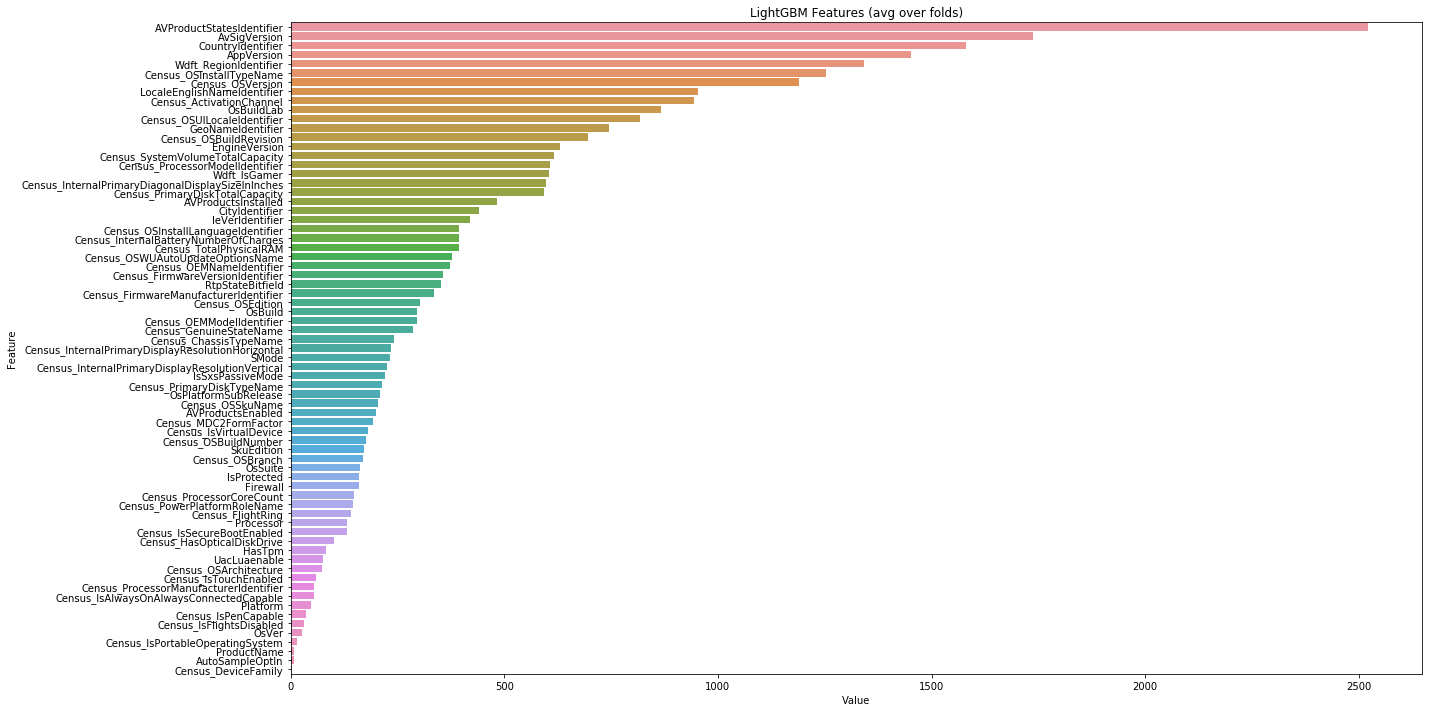

<Figure size 432x288 with 0 Axes>

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(m1.feature_importance(), x_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [97]:
top_30 = feature_imp.sort_index(ascending=False).iloc[:30, 1].tolist()

In [114]:
top_40 = feature_imp.sort_index(ascending=False).iloc[:40, 1].tolist()

### Model with top 30 Features

In [98]:
train_data = lgb.Dataset(x_train[top_30], label=y_train)
test_data = lgb.Dataset(x_val[top_30], label=y_val)

In [99]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.1,
    'verbose': 1
}

In [100]:
m2 = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=1000,
                       early_stopping_rounds=2)

[1]	valid_0's binary_logloss: 0.687954
Training until validation scores don't improve for 2 rounds.
[2]	valid_0's binary_logloss: 0.683458
[3]	valid_0's binary_logloss: 0.679981
[4]	valid_0's binary_logloss: 0.676752
[5]	valid_0's binary_logloss: 0.674062
[6]	valid_0's binary_logloss: 0.671511
[7]	valid_0's binary_logloss: 0.669437
[8]	valid_0's binary_logloss: 0.667503
[9]	valid_0's binary_logloss: 0.665727
[10]	valid_0's binary_logloss: 0.6645
[11]	valid_0's binary_logloss: 0.663064
[12]	valid_0's binary_logloss: 0.661952
[13]	valid_0's binary_logloss: 0.660833
[14]	valid_0's binary_logloss: 0.659948
[15]	valid_0's binary_logloss: 0.658877
[16]	valid_0's binary_logloss: 0.658048
[17]	valid_0's binary_logloss: 0.657442
[18]	valid_0's binary_logloss: 0.656763
[19]	valid_0's binary_logloss: 0.656163
[20]	valid_0's binary_logloss: 0.655614
[21]	valid_0's binary_logloss: 0.655051
[22]	valid_0's binary_logloss: 0.654448
[23]	valid_0's binary_logloss: 0.653967
[24]	valid_0's binary_logloss:

[203]	valid_0's binary_logloss: 0.635046
[204]	valid_0's binary_logloss: 0.635011
[205]	valid_0's binary_logloss: 0.634988
[206]	valid_0's binary_logloss: 0.634947
[207]	valid_0's binary_logloss: 0.634909
[208]	valid_0's binary_logloss: 0.634882
[209]	valid_0's binary_logloss: 0.634841
[210]	valid_0's binary_logloss: 0.634812
[211]	valid_0's binary_logloss: 0.634786
[212]	valid_0's binary_logloss: 0.634768
[213]	valid_0's binary_logloss: 0.634744
[214]	valid_0's binary_logloss: 0.634713
[215]	valid_0's binary_logloss: 0.634681
[216]	valid_0's binary_logloss: 0.634656
[217]	valid_0's binary_logloss: 0.634622
[218]	valid_0's binary_logloss: 0.634585
[219]	valid_0's binary_logloss: 0.634549
[220]	valid_0's binary_logloss: 0.634528
[221]	valid_0's binary_logloss: 0.634507
[222]	valid_0's binary_logloss: 0.634488
[223]	valid_0's binary_logloss: 0.634463
[224]	valid_0's binary_logloss: 0.634439
[225]	valid_0's binary_logloss: 0.634421
[226]	valid_0's binary_logloss: 0.634389
[227]	valid_0's 

[404]	valid_0's binary_logloss: 0.630988
[405]	valid_0's binary_logloss: 0.630982
[406]	valid_0's binary_logloss: 0.630973
[407]	valid_0's binary_logloss: 0.630954
[408]	valid_0's binary_logloss: 0.630921
[409]	valid_0's binary_logloss: 0.630905
[410]	valid_0's binary_logloss: 0.630892
[411]	valid_0's binary_logloss: 0.630873
[412]	valid_0's binary_logloss: 0.630866
[413]	valid_0's binary_logloss: 0.630862
[414]	valid_0's binary_logloss: 0.630827
[415]	valid_0's binary_logloss: 0.630809
[416]	valid_0's binary_logloss: 0.630801
[417]	valid_0's binary_logloss: 0.630786
[418]	valid_0's binary_logloss: 0.630782
[419]	valid_0's binary_logloss: 0.630771
[420]	valid_0's binary_logloss: 0.630764
[421]	valid_0's binary_logloss: 0.630754
[422]	valid_0's binary_logloss: 0.630732
[423]	valid_0's binary_logloss: 0.630719
[424]	valid_0's binary_logloss: 0.630713
[425]	valid_0's binary_logloss: 0.630704
[426]	valid_0's binary_logloss: 0.630692
[427]	valid_0's binary_logloss: 0.630685
[428]	valid_0's 

[606]	valid_0's binary_logloss: 0.628729
[607]	valid_0's binary_logloss: 0.628719
[608]	valid_0's binary_logloss: 0.628716
[609]	valid_0's binary_logloss: 0.628709
[610]	valid_0's binary_logloss: 0.628707
[611]	valid_0's binary_logloss: 0.628699
[612]	valid_0's binary_logloss: 0.628693
[613]	valid_0's binary_logloss: 0.628684
[614]	valid_0's binary_logloss: 0.628678
[615]	valid_0's binary_logloss: 0.62867
[616]	valid_0's binary_logloss: 0.628667
[617]	valid_0's binary_logloss: 0.628668
[618]	valid_0's binary_logloss: 0.628662
[619]	valid_0's binary_logloss: 0.628654
[620]	valid_0's binary_logloss: 0.628651
[621]	valid_0's binary_logloss: 0.628641
[622]	valid_0's binary_logloss: 0.628633
[623]	valid_0's binary_logloss: 0.628628
[624]	valid_0's binary_logloss: 0.628625
[625]	valid_0's binary_logloss: 0.628613
[626]	valid_0's binary_logloss: 0.628612
[627]	valid_0's binary_logloss: 0.628612
[628]	valid_0's binary_logloss: 0.628611
[629]	valid_0's binary_logloss: 0.628609
[630]	valid_0's b

[807]	valid_0's binary_logloss: 0.627493
[808]	valid_0's binary_logloss: 0.627481
[809]	valid_0's binary_logloss: 0.62748
[810]	valid_0's binary_logloss: 0.627472
[811]	valid_0's binary_logloss: 0.627452
[812]	valid_0's binary_logloss: 0.627449
[813]	valid_0's binary_logloss: 0.627447
[814]	valid_0's binary_logloss: 0.627445
[815]	valid_0's binary_logloss: 0.627445
[816]	valid_0's binary_logloss: 0.627434
[817]	valid_0's binary_logloss: 0.627428
[818]	valid_0's binary_logloss: 0.627406
[819]	valid_0's binary_logloss: 0.627395
[820]	valid_0's binary_logloss: 0.62739
[821]	valid_0's binary_logloss: 0.627383
[822]	valid_0's binary_logloss: 0.627374
[823]	valid_0's binary_logloss: 0.627371
[824]	valid_0's binary_logloss: 0.627362
[825]	valid_0's binary_logloss: 0.627353
[826]	valid_0's binary_logloss: 0.627345
[827]	valid_0's binary_logloss: 0.62734
[828]	valid_0's binary_logloss: 0.627337
[829]	valid_0's binary_logloss: 0.627335
[830]	valid_0's binary_logloss: 0.627328
[831]	valid_0's bin

In [101]:
preds = m2.predict(x_test[top_30])
tmp = preds > 0.5
from sklearn.metrics import accuracy_score

accuracy_score(y_test, tmp)

0.6454986779114251

In [103]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.1,
    'verbose': 1
}

In [104]:
m3 = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=1000,
                       early_stopping_rounds=2)

[1]	valid_0's binary_logloss: 0.688404
Training until validation scores don't improve for 2 rounds.
[2]	valid_0's binary_logloss: 0.683692
[3]	valid_0's binary_logloss: 0.679626
[4]	valid_0's binary_logloss: 0.676522
[5]	valid_0's binary_logloss: 0.673516
[6]	valid_0's binary_logloss: 0.670976
[7]	valid_0's binary_logloss: 0.668605
[8]	valid_0's binary_logloss: 0.667213
[9]	valid_0's binary_logloss: 0.665538
[10]	valid_0's binary_logloss: 0.664278
[11]	valid_0's binary_logloss: 0.662801
[12]	valid_0's binary_logloss: 0.661588
[13]	valid_0's binary_logloss: 0.660791
[14]	valid_0's binary_logloss: 0.659705
[15]	valid_0's binary_logloss: 0.658958
[16]	valid_0's binary_logloss: 0.658382
[17]	valid_0's binary_logloss: 0.657698
[18]	valid_0's binary_logloss: 0.656908
[19]	valid_0's binary_logloss: 0.656211
[20]	valid_0's binary_logloss: 0.655465
[21]	valid_0's binary_logloss: 0.654997
[22]	valid_0's binary_logloss: 0.654114
[23]	valid_0's binary_logloss: 0.653502
[24]	valid_0's binary_loglos

[203]	valid_0's binary_logloss: 0.633052
[204]	valid_0's binary_logloss: 0.633027
[205]	valid_0's binary_logloss: 0.632999
[206]	valid_0's binary_logloss: 0.632956
[207]	valid_0's binary_logloss: 0.632937
[208]	valid_0's binary_logloss: 0.632898
[209]	valid_0's binary_logloss: 0.632877
[210]	valid_0's binary_logloss: 0.632839
[211]	valid_0's binary_logloss: 0.632806
[212]	valid_0's binary_logloss: 0.632777
[213]	valid_0's binary_logloss: 0.632755
[214]	valid_0's binary_logloss: 0.632732
[215]	valid_0's binary_logloss: 0.632692
[216]	valid_0's binary_logloss: 0.63265
[217]	valid_0's binary_logloss: 0.632624
[218]	valid_0's binary_logloss: 0.632592
[219]	valid_0's binary_logloss: 0.632557
[220]	valid_0's binary_logloss: 0.632525
[221]	valid_0's binary_logloss: 0.632485
[222]	valid_0's binary_logloss: 0.632461
[223]	valid_0's binary_logloss: 0.632436
[224]	valid_0's binary_logloss: 0.632422
[225]	valid_0's binary_logloss: 0.632396
[226]	valid_0's binary_logloss: 0.632371
[227]	valid_0's b

[404]	valid_0's binary_logloss: 0.628681
[405]	valid_0's binary_logloss: 0.628672
[406]	valid_0's binary_logloss: 0.628667
[407]	valid_0's binary_logloss: 0.628654
[408]	valid_0's binary_logloss: 0.628652
[409]	valid_0's binary_logloss: 0.628644
[410]	valid_0's binary_logloss: 0.628637
[411]	valid_0's binary_logloss: 0.628624
[412]	valid_0's binary_logloss: 0.628611
[413]	valid_0's binary_logloss: 0.628559
[414]	valid_0's binary_logloss: 0.628539
[415]	valid_0's binary_logloss: 0.628527
[416]	valid_0's binary_logloss: 0.628507
[417]	valid_0's binary_logloss: 0.628502
[418]	valid_0's binary_logloss: 0.62849
[419]	valid_0's binary_logloss: 0.628489
[420]	valid_0's binary_logloss: 0.628483
[421]	valid_0's binary_logloss: 0.628465
[422]	valid_0's binary_logloss: 0.628453
[423]	valid_0's binary_logloss: 0.628439
[424]	valid_0's binary_logloss: 0.628414
[425]	valid_0's binary_logloss: 0.628403
[426]	valid_0's binary_logloss: 0.628382
[427]	valid_0's binary_logloss: 0.628367
[428]	valid_0's b

[605]	valid_0's binary_logloss: 0.626414
[606]	valid_0's binary_logloss: 0.626399
[607]	valid_0's binary_logloss: 0.626398
[608]	valid_0's binary_logloss: 0.626398
[609]	valid_0's binary_logloss: 0.626384
[610]	valid_0's binary_logloss: 0.626373
[611]	valid_0's binary_logloss: 0.626363
[612]	valid_0's binary_logloss: 0.626344
[613]	valid_0's binary_logloss: 0.626325
[614]	valid_0's binary_logloss: 0.626323
[615]	valid_0's binary_logloss: 0.62632
[616]	valid_0's binary_logloss: 0.626311
[617]	valid_0's binary_logloss: 0.626309
[618]	valid_0's binary_logloss: 0.626306
[619]	valid_0's binary_logloss: 0.6263
[620]	valid_0's binary_logloss: 0.6263
[621]	valid_0's binary_logloss: 0.626292
[622]	valid_0's binary_logloss: 0.626279
[623]	valid_0's binary_logloss: 0.626275
[624]	valid_0's binary_logloss: 0.626271
[625]	valid_0's binary_logloss: 0.626251
[626]	valid_0's binary_logloss: 0.62625
[627]	valid_0's binary_logloss: 0.626246
[628]	valid_0's binary_logloss: 0.62623
[629]	valid_0's binary_

In [105]:
preds = m1.predict(x_test)
tmp = preds > 0.5
from sklearn.metrics import accuracy_score

accuracy_score(y_test, tmp)

0.6441087755520658

In [106]:
test.shape

(7853253, 71)

In [108]:
preds = m2.predict(test[top_30])
df = pd.DataFrame()
df['HasDetections'] = preds
df['MachineIdentifier'] = pd.read_csv('test.csv.zip', usecols=['MachineIdentifier'])
df.to_csv('sub8.gz', compression='gzip', index=False)

In [109]:
df.head()

,HasDetections,MachineIdentifier
0,0.531378,0000010489e3af074adeac69c53e555e
1,0.595085,00000176ac758d54827acd545b6315a5
2,0.476532,0000019dcefc128c2d4387c1273dae1d
3,0.413538,0000055553dc51b1295785415f1a224d
4,0.453736,00000574cefffeca83ec8adf9285b2bf


In [139]:
import gc
gc.collect()

203

In [111]:
train_data = lgb.Dataset(x_train[top_30], label=y_train)
test_data = lgb.Dataset(x_val[top_30], label=y_val)

In [113]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'is_unbalance': 'false',
    'boosting': 'dart',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.1,
    'verbose': 1
}
m4 = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=1000)
preds = m4.predict(x_test[top_30])
tmp = preds > 0.5
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, tmp))

[1]	valid_0's binary_logloss: 0.687954
[2]	valid_0's binary_logloss: 0.683458
[3]	valid_0's binary_logloss: 0.679981
[4]	valid_0's binary_logloss: 0.676752
[5]	valid_0's binary_logloss: 0.674062
[6]	valid_0's binary_logloss: 0.671511
[7]	valid_0's binary_logloss: 0.669437
[8]	valid_0's binary_logloss: 0.670376
[9]	valid_0's binary_logloss: 0.6682
[10]	valid_0's binary_logloss: 0.666745
[11]	valid_0's binary_logloss: 0.66522
[12]	valid_0's binary_logloss: 0.665881
[13]	valid_0's binary_logloss: 0.664418
[14]	valid_0's binary_logloss: 0.663195
[15]	valid_0's binary_logloss: 0.661801
[16]	valid_0's binary_logloss: 0.660768
[17]	valid_0's binary_logloss: 0.659879
[18]	valid_0's binary_logloss: 0.658847
[19]	valid_0's binary_logloss: 0.658056
[20]	valid_0's binary_logloss: 0.657355
[21]	valid_0's binary_logloss: 0.657599
[22]	valid_0's binary_logloss: 0.656893
[23]	valid_0's binary_logloss: 0.656285
[24]	valid_0's binary_logloss: 0.655679
[25]	valid_0's binary_logloss: 0.655176
[26]	valid_0

[205]	valid_0's binary_logloss: 0.64423
[206]	valid_0's binary_logloss: 0.644093
[207]	valid_0's binary_logloss: 0.644197
[208]	valid_0's binary_logloss: 0.644049
[209]	valid_0's binary_logloss: 0.644161
[210]	valid_0's binary_logloss: 0.644263
[211]	valid_0's binary_logloss: 0.644364
[212]	valid_0's binary_logloss: 0.644207
[213]	valid_0's binary_logloss: 0.644022
[214]	valid_0's binary_logloss: 0.643865
[215]	valid_0's binary_logloss: 0.643729
[216]	valid_0's binary_logloss: 0.643839
[217]	valid_0's binary_logloss: 0.643652
[218]	valid_0's binary_logloss: 0.643496
[219]	valid_0's binary_logloss: 0.643589
[220]	valid_0's binary_logloss: 0.643429
[221]	valid_0's binary_logloss: 0.643526
[222]	valid_0's binary_logloss: 0.643402
[223]	valid_0's binary_logloss: 0.643226
[224]	valid_0's binary_logloss: 0.643335
[225]	valid_0's binary_logloss: 0.64344
[226]	valid_0's binary_logloss: 0.643529
[227]	valid_0's binary_logloss: 0.643605
[228]	valid_0's binary_logloss: 0.643459
[229]	valid_0's bi

[406]	valid_0's binary_logloss: 0.638058
[407]	valid_0's binary_logloss: 0.637977
[408]	valid_0's binary_logloss: 0.638031
[409]	valid_0's binary_logloss: 0.637964
[410]	valid_0's binary_logloss: 0.637895
[411]	valid_0's binary_logloss: 0.637833
[412]	valid_0's binary_logloss: 0.637885
[413]	valid_0's binary_logloss: 0.637939
[414]	valid_0's binary_logloss: 0.637869
[415]	valid_0's binary_logloss: 0.637805
[416]	valid_0's binary_logloss: 0.637751
[417]	valid_0's binary_logloss: 0.637807
[418]	valid_0's binary_logloss: 0.637859
[419]	valid_0's binary_logloss: 0.637795
[420]	valid_0's binary_logloss: 0.637846
[421]	valid_0's binary_logloss: 0.637764
[422]	valid_0's binary_logloss: 0.637699
[423]	valid_0's binary_logloss: 0.637637
[424]	valid_0's binary_logloss: 0.637578
[425]	valid_0's binary_logloss: 0.637631
[426]	valid_0's binary_logloss: 0.637572
[427]	valid_0's binary_logloss: 0.637496
[428]	valid_0's binary_logloss: 0.637551
[429]	valid_0's binary_logloss: 0.637484
[430]	valid_0's 

[607]	valid_0's binary_logloss: 0.635601
[608]	valid_0's binary_logloss: 0.635546
[609]	valid_0's binary_logloss: 0.635499
[610]	valid_0's binary_logloss: 0.635458
[611]	valid_0's binary_logloss: 0.635413
[612]	valid_0's binary_logloss: 0.635368
[613]	valid_0's binary_logloss: 0.635403
[614]	valid_0's binary_logloss: 0.635363
[615]	valid_0's binary_logloss: 0.635315
[616]	valid_0's binary_logloss: 0.635275
[617]	valid_0's binary_logloss: 0.635308
[618]	valid_0's binary_logloss: 0.635267
[619]	valid_0's binary_logloss: 0.635201
[620]	valid_0's binary_logloss: 0.635129
[621]	valid_0's binary_logloss: 0.635161
[622]	valid_0's binary_logloss: 0.635195
[623]	valid_0's binary_logloss: 0.635148
[624]	valid_0's binary_logloss: 0.635179
[625]	valid_0's binary_logloss: 0.635134
[626]	valid_0's binary_logloss: 0.635095
[627]	valid_0's binary_logloss: 0.635037
[628]	valid_0's binary_logloss: 0.634992
[629]	valid_0's binary_logloss: 0.635027
[630]	valid_0's binary_logloss: 0.635059
[631]	valid_0's 

[808]	valid_0's binary_logloss: 0.633684
[809]	valid_0's binary_logloss: 0.633707
[810]	valid_0's binary_logloss: 0.633671
[811]	valid_0's binary_logloss: 0.633614
[812]	valid_0's binary_logloss: 0.633638
[813]	valid_0's binary_logloss: 0.633603
[814]	valid_0's binary_logloss: 0.633628
[815]	valid_0's binary_logloss: 0.633581
[816]	valid_0's binary_logloss: 0.633545
[817]	valid_0's binary_logloss: 0.633567
[818]	valid_0's binary_logloss: 0.633524
[819]	valid_0's binary_logloss: 0.633547
[820]	valid_0's binary_logloss: 0.633574
[821]	valid_0's binary_logloss: 0.633531
[822]	valid_0's binary_logloss: 0.633555
[823]	valid_0's binary_logloss: 0.633505
[824]	valid_0's binary_logloss: 0.633461
[825]	valid_0's binary_logloss: 0.633425
[826]	valid_0's binary_logloss: 0.633448
[827]	valid_0's binary_logloss: 0.633473
[828]	valid_0's binary_logloss: 0.633448
[829]	valid_0's binary_logloss: 0.633401
[830]	valid_0's binary_logloss: 0.633379
[831]	valid_0's binary_logloss: 0.633345
[832]	valid_0's 

In [114]:
top_40 = feature_imp.sort_index(ascending=False).iloc[:40, 1].tolist()

In [115]:
train_data = lgb.Dataset(x_train[top_40], label=y_train)
test_data = lgb.Dataset(x_val[top_40], label=y_val)

In [116]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.1,
    'verbose': 1
}

In [117]:
m5 = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=1000,
                       early_stopping_rounds=2)

[1]	valid_0's binary_logloss: 0.687912
Training until validation scores don't improve for 2 rounds.
[2]	valid_0's binary_logloss: 0.683583
[3]	valid_0's binary_logloss: 0.681369
[4]	valid_0's binary_logloss: 0.678019
[5]	valid_0's binary_logloss: 0.676153
[6]	valid_0's binary_logloss: 0.674565
[7]	valid_0's binary_logloss: 0.671336
[8]	valid_0's binary_logloss: 0.670133
[9]	valid_0's binary_logloss: 0.667579
[10]	valid_0's binary_logloss: 0.665628
[11]	valid_0's binary_logloss: 0.664653
[12]	valid_0's binary_logloss: 0.663731
[13]	valid_0's binary_logloss: 0.662272
[14]	valid_0's binary_logloss: 0.661023
[15]	valid_0's binary_logloss: 0.65989
[16]	valid_0's binary_logloss: 0.658713
[17]	valid_0's binary_logloss: 0.657891
[18]	valid_0's binary_logloss: 0.657272
[19]	valid_0's binary_logloss: 0.656632
[20]	valid_0's binary_logloss: 0.655847
[21]	valid_0's binary_logloss: 0.65528
[22]	valid_0's binary_logloss: 0.654658
[23]	valid_0's binary_logloss: 0.654174
[24]	valid_0's binary_logloss:

[203]	valid_0's binary_logloss: 0.634072
[204]	valid_0's binary_logloss: 0.634044
[205]	valid_0's binary_logloss: 0.634017
[206]	valid_0's binary_logloss: 0.63397
[207]	valid_0's binary_logloss: 0.633938
[208]	valid_0's binary_logloss: 0.633889
[209]	valid_0's binary_logloss: 0.633862
[210]	valid_0's binary_logloss: 0.63382
[211]	valid_0's binary_logloss: 0.633789
[212]	valid_0's binary_logloss: 0.633754
[213]	valid_0's binary_logloss: 0.633715
[214]	valid_0's binary_logloss: 0.633692
[215]	valid_0's binary_logloss: 0.633659
[216]	valid_0's binary_logloss: 0.633618
[217]	valid_0's binary_logloss: 0.633597
[218]	valid_0's binary_logloss: 0.633572
[219]	valid_0's binary_logloss: 0.633551
[220]	valid_0's binary_logloss: 0.633508
[221]	valid_0's binary_logloss: 0.633486
[222]	valid_0's binary_logloss: 0.63346
[223]	valid_0's binary_logloss: 0.633439
[224]	valid_0's binary_logloss: 0.633391
[225]	valid_0's binary_logloss: 0.633369
[226]	valid_0's binary_logloss: 0.633315
[227]	valid_0's bin

[404]	valid_0's binary_logloss: 0.629653
[405]	valid_0's binary_logloss: 0.629632
[406]	valid_0's binary_logloss: 0.629616
[407]	valid_0's binary_logloss: 0.629601
[408]	valid_0's binary_logloss: 0.629588
[409]	valid_0's binary_logloss: 0.629568
[410]	valid_0's binary_logloss: 0.629558
[411]	valid_0's binary_logloss: 0.629538
[412]	valid_0's binary_logloss: 0.629533
[413]	valid_0's binary_logloss: 0.629526
[414]	valid_0's binary_logloss: 0.629516
[415]	valid_0's binary_logloss: 0.629509
[416]	valid_0's binary_logloss: 0.629491
[417]	valid_0's binary_logloss: 0.629483
[418]	valid_0's binary_logloss: 0.629474
[419]	valid_0's binary_logloss: 0.629467
[420]	valid_0's binary_logloss: 0.629459
[421]	valid_0's binary_logloss: 0.629454
[422]	valid_0's binary_logloss: 0.62944
[423]	valid_0's binary_logloss: 0.629426
[424]	valid_0's binary_logloss: 0.629404
[425]	valid_0's binary_logloss: 0.629384
[426]	valid_0's binary_logloss: 0.629372
[427]	valid_0's binary_logloss: 0.629354
[428]	valid_0's b

[605]	valid_0's binary_logloss: 0.627356
[606]	valid_0's binary_logloss: 0.627336
[607]	valid_0's binary_logloss: 0.627332
[608]	valid_0's binary_logloss: 0.627331
[609]	valid_0's binary_logloss: 0.627325
[610]	valid_0's binary_logloss: 0.627306
[611]	valid_0's binary_logloss: 0.627302
[612]	valid_0's binary_logloss: 0.627298
[613]	valid_0's binary_logloss: 0.627286
[614]	valid_0's binary_logloss: 0.627272
[615]	valid_0's binary_logloss: 0.627266
[616]	valid_0's binary_logloss: 0.627259
[617]	valid_0's binary_logloss: 0.627256
[618]	valid_0's binary_logloss: 0.627252
[619]	valid_0's binary_logloss: 0.62724
[620]	valid_0's binary_logloss: 0.627239
[621]	valid_0's binary_logloss: 0.627237
[622]	valid_0's binary_logloss: 0.627224
[623]	valid_0's binary_logloss: 0.62722
[624]	valid_0's binary_logloss: 0.627213
[625]	valid_0's binary_logloss: 0.627203
[626]	valid_0's binary_logloss: 0.627191
[627]	valid_0's binary_logloss: 0.627189
[628]	valid_0's binary_logloss: 0.627188
[629]	valid_0's bi

[806]	valid_0's binary_logloss: 0.626129
[807]	valid_0's binary_logloss: 0.626124
[808]	valid_0's binary_logloss: 0.626097
[809]	valid_0's binary_logloss: 0.626093
[810]	valid_0's binary_logloss: 0.626081
[811]	valid_0's binary_logloss: 0.626076
[812]	valid_0's binary_logloss: 0.626075
[813]	valid_0's binary_logloss: 0.62607
[814]	valid_0's binary_logloss: 0.62606
[815]	valid_0's binary_logloss: 0.62606
[816]	valid_0's binary_logloss: 0.626056
[817]	valid_0's binary_logloss: 0.626051
[818]	valid_0's binary_logloss: 0.626046
[819]	valid_0's binary_logloss: 0.626044
[820]	valid_0's binary_logloss: 0.626026
[821]	valid_0's binary_logloss: 0.626019
[822]	valid_0's binary_logloss: 0.626014
[823]	valid_0's binary_logloss: 0.626006
[824]	valid_0's binary_logloss: 0.625994
[825]	valid_0's binary_logloss: 0.625986
[826]	valid_0's binary_logloss: 0.625977
[827]	valid_0's binary_logloss: 0.625975
[828]	valid_0's binary_logloss: 0.625967
[829]	valid_0's binary_logloss: 0.625958
[830]	valid_0's bin

In [118]:
preds = m5.predict(x_test[top_40])
tmp = preds > 0.5
from sklearn.metrics import accuracy_score

accuracy_score(y_test, tmp)

0.6475588718924754

In [119]:
preds = m5.predict(test[top_40])
df = pd.DataFrame()
df['HasDetections'] = preds
df['MachineIdentifier'] = pd.read_csv('test.csv.zip', usecols=['MachineIdentifier'])
df.to_csv('sub8.gz', compression='gzip', index=False)

In [122]:
top_50 = feature_imp.sort_index(ascending=False).iloc[:50, 1].tolist()

In [123]:
train_data = lgb.Dataset(x_train[top_50], label=y_train)
test_data = lgb.Dataset(x_val[top_50], label=y_val)

In [124]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.1,
    'verbose': 1
}

In [128]:
m6 = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=1000,
                       early_stopping_rounds=2)

[1]	valid_0's binary_logloss: 0.687892
Training until validation scores don't improve for 2 rounds.
[2]	valid_0's binary_logloss: 0.683458
[3]	valid_0's binary_logloss: 0.680849
[4]	valid_0's binary_logloss: 0.677212
[5]	valid_0's binary_logloss: 0.675327
[6]	valid_0's binary_logloss: 0.672651
[7]	valid_0's binary_logloss: 0.670276
[8]	valid_0's binary_logloss: 0.668237
[9]	valid_0's binary_logloss: 0.666989
[10]	valid_0's binary_logloss: 0.665289
[11]	valid_0's binary_logloss: 0.663769
[12]	valid_0's binary_logloss: 0.662329
[13]	valid_0's binary_logloss: 0.661158
[14]	valid_0's binary_logloss: 0.660177
[15]	valid_0's binary_logloss: 0.659481
[16]	valid_0's binary_logloss: 0.658619
[17]	valid_0's binary_logloss: 0.657827
[18]	valid_0's binary_logloss: 0.657279
[19]	valid_0's binary_logloss: 0.656794
[20]	valid_0's binary_logloss: 0.656256
[21]	valid_0's binary_logloss: 0.655791
[22]	valid_0's binary_logloss: 0.654943
[23]	valid_0's binary_logloss: 0.654382
[24]	valid_0's binary_loglos

[203]	valid_0's binary_logloss: 0.633674
[204]	valid_0's binary_logloss: 0.633655
[205]	valid_0's binary_logloss: 0.633628
[206]	valid_0's binary_logloss: 0.633595
[207]	valid_0's binary_logloss: 0.63354
[208]	valid_0's binary_logloss: 0.633508
[209]	valid_0's binary_logloss: 0.633473
[210]	valid_0's binary_logloss: 0.633438
[211]	valid_0's binary_logloss: 0.633399
[212]	valid_0's binary_logloss: 0.633375
[213]	valid_0's binary_logloss: 0.633353
[214]	valid_0's binary_logloss: 0.633316
[215]	valid_0's binary_logloss: 0.633265
[216]	valid_0's binary_logloss: 0.633246
[217]	valid_0's binary_logloss: 0.633189
[218]	valid_0's binary_logloss: 0.633156
[219]	valid_0's binary_logloss: 0.633133
[220]	valid_0's binary_logloss: 0.633107
[221]	valid_0's binary_logloss: 0.633079
[222]	valid_0's binary_logloss: 0.633042
[223]	valid_0's binary_logloss: 0.633017
[224]	valid_0's binary_logloss: 0.632986
[225]	valid_0's binary_logloss: 0.632944
[226]	valid_0's binary_logloss: 0.632902
[227]	valid_0's b

[404]	valid_0's binary_logloss: 0.629452
[405]	valid_0's binary_logloss: 0.629437
[406]	valid_0's binary_logloss: 0.62942
[407]	valid_0's binary_logloss: 0.629407
[408]	valid_0's binary_logloss: 0.629401
[409]	valid_0's binary_logloss: 0.629392
[410]	valid_0's binary_logloss: 0.629377
[411]	valid_0's binary_logloss: 0.629369
[412]	valid_0's binary_logloss: 0.629357
[413]	valid_0's binary_logloss: 0.629348
[414]	valid_0's binary_logloss: 0.629331
[415]	valid_0's binary_logloss: 0.629326
[416]	valid_0's binary_logloss: 0.629318
[417]	valid_0's binary_logloss: 0.629294
[418]	valid_0's binary_logloss: 0.629279
[419]	valid_0's binary_logloss: 0.629269
[420]	valid_0's binary_logloss: 0.629219
[421]	valid_0's binary_logloss: 0.62921
[422]	valid_0's binary_logloss: 0.629198
[423]	valid_0's binary_logloss: 0.629189
[424]	valid_0's binary_logloss: 0.629175
[425]	valid_0's binary_logloss: 0.629161
[426]	valid_0's binary_logloss: 0.629142
[427]	valid_0's binary_logloss: 0.629132
[428]	valid_0's bi

[605]	valid_0's binary_logloss: 0.6272
[606]	valid_0's binary_logloss: 0.62719
[607]	valid_0's binary_logloss: 0.627187
[608]	valid_0's binary_logloss: 0.627182
[609]	valid_0's binary_logloss: 0.62718
[610]	valid_0's binary_logloss: 0.62717
[611]	valid_0's binary_logloss: 0.627164
[612]	valid_0's binary_logloss: 0.627161
[613]	valid_0's binary_logloss: 0.627126
[614]	valid_0's binary_logloss: 0.627105
[615]	valid_0's binary_logloss: 0.627102
[616]	valid_0's binary_logloss: 0.62709
[617]	valid_0's binary_logloss: 0.627088
[618]	valid_0's binary_logloss: 0.627077
[619]	valid_0's binary_logloss: 0.627072
[620]	valid_0's binary_logloss: 0.627066
[621]	valid_0's binary_logloss: 0.627056
[622]	valid_0's binary_logloss: 0.627032
[623]	valid_0's binary_logloss: 0.627024
[624]	valid_0's binary_logloss: 0.627014
[625]	valid_0's binary_logloss: 0.627012
[626]	valid_0's binary_logloss: 0.62701
[627]	valid_0's binary_logloss: 0.62701
[628]	valid_0's binary_logloss: 0.62701
[629]	valid_0's binary_lo

[806]	valid_0's binary_logloss: 0.625811
[807]	valid_0's binary_logloss: 0.6258
[808]	valid_0's binary_logloss: 0.625794
[809]	valid_0's binary_logloss: 0.62579
[810]	valid_0's binary_logloss: 0.625781
[811]	valid_0's binary_logloss: 0.625779
[812]	valid_0's binary_logloss: 0.625773
[813]	valid_0's binary_logloss: 0.625771
[814]	valid_0's binary_logloss: 0.625763
[815]	valid_0's binary_logloss: 0.625757
[816]	valid_0's binary_logloss: 0.625749
[817]	valid_0's binary_logloss: 0.62575
[818]	valid_0's binary_logloss: 0.625746
[819]	valid_0's binary_logloss: 0.625745
[820]	valid_0's binary_logloss: 0.625741
[821]	valid_0's binary_logloss: 0.625734
[822]	valid_0's binary_logloss: 0.625728
[823]	valid_0's binary_logloss: 0.62572
[824]	valid_0's binary_logloss: 0.625713
[825]	valid_0's binary_logloss: 0.625707
[826]	valid_0's binary_logloss: 0.625704
[827]	valid_0's binary_logloss: 0.625697
[828]	valid_0's binary_logloss: 0.625693
[829]	valid_0's binary_logloss: 0.625681
[830]	valid_0's binar

In [129]:
preds = m6.predict(x_test[top_50])
tmp = preds > 0.5
from sklearn.metrics import accuracy_score

accuracy_score(y_test, tmp)

0.6479466994862966

In [119]:
preds = m5.predict(test[top_40])
df = pd.DataFrame()
df['HasDetections'] = preds
df['MachineIdentifier'] = pd.read_csv('test.csv.zip', usecols=['MachineIdentifier'])
df.to_csv('sub8.gz', compression='gzip', index=False)

In [135]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [136]:
display_all(feature_imp.sort_index(ascending=False).reindex())

,Value,Feature
70,2522,AVProductStatesIdentifier
69,1738,AvSigVersion
68,1580,CountryIdentifier
67,1452,AppVersion
66,1343,Wdft_RegionIdentifier
65,1254,Census_OSInstallTypeName
64,1190,Census_OSVersion
63,953,LocaleEnglishNameIdentifier
62,945,Census_ActivationChannel
61,868,OsBuildLab


In [137]:
top_56 = feature_imp.sort_index(ascending=False).iloc[:56, 1].tolist()

In [150]:
train_data = lgb.Dataset(x_train[top_56], label=y_train)
test_data = lgb.Dataset(x_val[top_56], label=y_val)

In [140]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.1,
    'verbose': 1
}

In [141]:
m7 = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=1000,
                       early_stopping_rounds=2)

[1]	valid_0's binary_logloss: 0.687899
Training until validation scores don't improve for 2 rounds.
[2]	valid_0's binary_logloss: 0.683289
[3]	valid_0's binary_logloss: 0.679592
[4]	valid_0's binary_logloss: 0.676331
[5]	valid_0's binary_logloss: 0.673356
[6]	valid_0's binary_logloss: 0.671702
[7]	valid_0's binary_logloss: 0.668954
[8]	valid_0's binary_logloss: 0.667768
[9]	valid_0's binary_logloss: 0.665936
[10]	valid_0's binary_logloss: 0.664435
[11]	valid_0's binary_logloss: 0.663004
[12]	valid_0's binary_logloss: 0.661784
[13]	valid_0's binary_logloss: 0.660717
[14]	valid_0's binary_logloss: 0.659753
[15]	valid_0's binary_logloss: 0.658763
[16]	valid_0's binary_logloss: 0.657956
[17]	valid_0's binary_logloss: 0.657294
[18]	valid_0's binary_logloss: 0.656792
[19]	valid_0's binary_logloss: 0.656191
[20]	valid_0's binary_logloss: 0.655559
[21]	valid_0's binary_logloss: 0.655142
[22]	valid_0's binary_logloss: 0.65465
[23]	valid_0's binary_logloss: 0.654138
[24]	valid_0's binary_logloss

[203]	valid_0's binary_logloss: 0.633535
[204]	valid_0's binary_logloss: 0.633503
[205]	valid_0's binary_logloss: 0.633477
[206]	valid_0's binary_logloss: 0.63345
[207]	valid_0's binary_logloss: 0.633391
[208]	valid_0's binary_logloss: 0.633365
[209]	valid_0's binary_logloss: 0.633322
[210]	valid_0's binary_logloss: 0.633294
[211]	valid_0's binary_logloss: 0.633272
[212]	valid_0's binary_logloss: 0.63325
[213]	valid_0's binary_logloss: 0.633229
[214]	valid_0's binary_logloss: 0.633192
[215]	valid_0's binary_logloss: 0.633147
[216]	valid_0's binary_logloss: 0.633076
[217]	valid_0's binary_logloss: 0.633045
[218]	valid_0's binary_logloss: 0.633012
[219]	valid_0's binary_logloss: 0.632993
[220]	valid_0's binary_logloss: 0.632966
[221]	valid_0's binary_logloss: 0.632935
[222]	valid_0's binary_logloss: 0.632886
[223]	valid_0's binary_logloss: 0.632868
[224]	valid_0's binary_logloss: 0.63284
[225]	valid_0's binary_logloss: 0.6328
[226]	valid_0's binary_logloss: 0.632783
[227]	valid_0's binar

[404]	valid_0's binary_logloss: 0.629204
[405]	valid_0's binary_logloss: 0.629184
[406]	valid_0's binary_logloss: 0.629176
[407]	valid_0's binary_logloss: 0.629149
[408]	valid_0's binary_logloss: 0.629136
[409]	valid_0's binary_logloss: 0.629121
[410]	valid_0's binary_logloss: 0.629106
[411]	valid_0's binary_logloss: 0.629086
[412]	valid_0's binary_logloss: 0.629044
[413]	valid_0's binary_logloss: 0.62904
[414]	valid_0's binary_logloss: 0.629024
[415]	valid_0's binary_logloss: 0.629006
[416]	valid_0's binary_logloss: 0.628988
[417]	valid_0's binary_logloss: 0.62898
[418]	valid_0's binary_logloss: 0.628973
[419]	valid_0's binary_logloss: 0.628962
[420]	valid_0's binary_logloss: 0.628956
[421]	valid_0's binary_logloss: 0.628937
[422]	valid_0's binary_logloss: 0.628917
[423]	valid_0's binary_logloss: 0.628899
[424]	valid_0's binary_logloss: 0.628883
[425]	valid_0's binary_logloss: 0.628871
[426]	valid_0's binary_logloss: 0.62885
[427]	valid_0's binary_logloss: 0.628835
[428]	valid_0's bin

[605]	valid_0's binary_logloss: 0.626841
[606]	valid_0's binary_logloss: 0.626832
[607]	valid_0's binary_logloss: 0.626816
[608]	valid_0's binary_logloss: 0.626811
[609]	valid_0's binary_logloss: 0.626808
[610]	valid_0's binary_logloss: 0.626798
[611]	valid_0's binary_logloss: 0.626788
[612]	valid_0's binary_logloss: 0.626781
[613]	valid_0's binary_logloss: 0.62678
[614]	valid_0's binary_logloss: 0.62675
[615]	valid_0's binary_logloss: 0.626744
[616]	valid_0's binary_logloss: 0.626739
[617]	valid_0's binary_logloss: 0.626734
[618]	valid_0's binary_logloss: 0.626732
[619]	valid_0's binary_logloss: 0.62671
[620]	valid_0's binary_logloss: 0.626699
[621]	valid_0's binary_logloss: 0.626689
[622]	valid_0's binary_logloss: 0.62668
[623]	valid_0's binary_logloss: 0.62666
[624]	valid_0's binary_logloss: 0.626632
[625]	valid_0's binary_logloss: 0.626623
[626]	valid_0's binary_logloss: 0.62662
[627]	valid_0's binary_logloss: 0.626615
[628]	valid_0's binary_logloss: 0.626613
[629]	valid_0's binary

[806]	valid_0's binary_logloss: 0.62549
[807]	valid_0's binary_logloss: 0.625484
[808]	valid_0's binary_logloss: 0.62548
[809]	valid_0's binary_logloss: 0.625467
[810]	valid_0's binary_logloss: 0.625464
[811]	valid_0's binary_logloss: 0.625464
[812]	valid_0's binary_logloss: 0.625464
[813]	valid_0's binary_logloss: 0.625452
[814]	valid_0's binary_logloss: 0.625443
[815]	valid_0's binary_logloss: 0.625438
[816]	valid_0's binary_logloss: 0.625434
[817]	valid_0's binary_logloss: 0.625435
[818]	valid_0's binary_logloss: 0.625431
[819]	valid_0's binary_logloss: 0.625432
[820]	valid_0's binary_logloss: 0.625414
[821]	valid_0's binary_logloss: 0.625398
[822]	valid_0's binary_logloss: 0.625391
[823]	valid_0's binary_logloss: 0.625389
[824]	valid_0's binary_logloss: 0.62538
[825]	valid_0's binary_logloss: 0.625376
[826]	valid_0's binary_logloss: 0.625373
[827]	valid_0's binary_logloss: 0.625365
[828]	valid_0's binary_logloss: 0.625361
[829]	valid_0's binary_logloss: 0.625348
[830]	valid_0's bin

In [142]:
preds = m7.predict(x_test[top_56])
tmp = preds > 0.5
from sklearn.metrics import accuracy_score

accuracy_score(y_test, tmp)

0.6483042630771317

In [143]:
preds = m7.predict(test[top_56])
df = pd.DataFrame()
df['HasDetections'] = preds
df['MachineIdentifier'] = pd.read_csv('test.csv.zip', usecols=['MachineIdentifier'])
df.to_csv('sub8.gz', compression='gzip', index=False)

In [ ]:
max_depth=-1,
                                   n_estimators=30000,
                                   learning_rate=0.05,
                                   num_leaves=2**12-1,
                                   colsample_bytree=0.28,
                                   objective='binary', 
                                   n_jobs=-1

In [144]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.1,
    'verbose': 1
}

In [145]:
m7 = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=3000,
                       early_stopping_rounds=4)

[1]	valid_0's binary_logloss: 0.687899
Training until validation scores don't improve for 4 rounds.
[2]	valid_0's binary_logloss: 0.683289
[3]	valid_0's binary_logloss: 0.679592
[4]	valid_0's binary_logloss: 0.676331
[5]	valid_0's binary_logloss: 0.673356
[6]	valid_0's binary_logloss: 0.671702
[7]	valid_0's binary_logloss: 0.668954
[8]	valid_0's binary_logloss: 0.667768
[9]	valid_0's binary_logloss: 0.665936
[10]	valid_0's binary_logloss: 0.664435
[11]	valid_0's binary_logloss: 0.663004
[12]	valid_0's binary_logloss: 0.661784
[13]	valid_0's binary_logloss: 0.660717
[14]	valid_0's binary_logloss: 0.659753
[15]	valid_0's binary_logloss: 0.658763
[16]	valid_0's binary_logloss: 0.657956
[17]	valid_0's binary_logloss: 0.657294
[18]	valid_0's binary_logloss: 0.656792
[19]	valid_0's binary_logloss: 0.656191
[20]	valid_0's binary_logloss: 0.655559
[21]	valid_0's binary_logloss: 0.655142
[22]	valid_0's binary_logloss: 0.65465
[23]	valid_0's binary_logloss: 0.654138
[24]	valid_0's binary_logloss

[203]	valid_0's binary_logloss: 0.633535
[204]	valid_0's binary_logloss: 0.633503
[205]	valid_0's binary_logloss: 0.633477
[206]	valid_0's binary_logloss: 0.63345
[207]	valid_0's binary_logloss: 0.633391
[208]	valid_0's binary_logloss: 0.633365
[209]	valid_0's binary_logloss: 0.633322
[210]	valid_0's binary_logloss: 0.633294
[211]	valid_0's binary_logloss: 0.633272
[212]	valid_0's binary_logloss: 0.63325
[213]	valid_0's binary_logloss: 0.633229
[214]	valid_0's binary_logloss: 0.633192
[215]	valid_0's binary_logloss: 0.633147
[216]	valid_0's binary_logloss: 0.633076
[217]	valid_0's binary_logloss: 0.633045
[218]	valid_0's binary_logloss: 0.633012
[219]	valid_0's binary_logloss: 0.632993
[220]	valid_0's binary_logloss: 0.632966
[221]	valid_0's binary_logloss: 0.632935
[222]	valid_0's binary_logloss: 0.632886
[223]	valid_0's binary_logloss: 0.632868
[224]	valid_0's binary_logloss: 0.63284
[225]	valid_0's binary_logloss: 0.6328
[226]	valid_0's binary_logloss: 0.632783
[227]	valid_0's binar

[404]	valid_0's binary_logloss: 0.629204
[405]	valid_0's binary_logloss: 0.629184
[406]	valid_0's binary_logloss: 0.629176
[407]	valid_0's binary_logloss: 0.629149
[408]	valid_0's binary_logloss: 0.629136
[409]	valid_0's binary_logloss: 0.629121
[410]	valid_0's binary_logloss: 0.629106
[411]	valid_0's binary_logloss: 0.629086
[412]	valid_0's binary_logloss: 0.629044
[413]	valid_0's binary_logloss: 0.62904
[414]	valid_0's binary_logloss: 0.629024
[415]	valid_0's binary_logloss: 0.629006
[416]	valid_0's binary_logloss: 0.628988
[417]	valid_0's binary_logloss: 0.62898
[418]	valid_0's binary_logloss: 0.628973
[419]	valid_0's binary_logloss: 0.628962
[420]	valid_0's binary_logloss: 0.628956
[421]	valid_0's binary_logloss: 0.628937
[422]	valid_0's binary_logloss: 0.628917
[423]	valid_0's binary_logloss: 0.628899
[424]	valid_0's binary_logloss: 0.628883
[425]	valid_0's binary_logloss: 0.628871
[426]	valid_0's binary_logloss: 0.62885
[427]	valid_0's binary_logloss: 0.628835
[428]	valid_0's bin

[605]	valid_0's binary_logloss: 0.626841
[606]	valid_0's binary_logloss: 0.626832
[607]	valid_0's binary_logloss: 0.626816
[608]	valid_0's binary_logloss: 0.626811
[609]	valid_0's binary_logloss: 0.626808
[610]	valid_0's binary_logloss: 0.626798
[611]	valid_0's binary_logloss: 0.626788
[612]	valid_0's binary_logloss: 0.626781
[613]	valid_0's binary_logloss: 0.62678
[614]	valid_0's binary_logloss: 0.62675
[615]	valid_0's binary_logloss: 0.626744
[616]	valid_0's binary_logloss: 0.626739
[617]	valid_0's binary_logloss: 0.626734
[618]	valid_0's binary_logloss: 0.626732
[619]	valid_0's binary_logloss: 0.62671
[620]	valid_0's binary_logloss: 0.626699
[621]	valid_0's binary_logloss: 0.626689
[622]	valid_0's binary_logloss: 0.62668
[623]	valid_0's binary_logloss: 0.62666
[624]	valid_0's binary_logloss: 0.626632
[625]	valid_0's binary_logloss: 0.626623
[626]	valid_0's binary_logloss: 0.62662
[627]	valid_0's binary_logloss: 0.626615
[628]	valid_0's binary_logloss: 0.626613
[629]	valid_0's binary

[806]	valid_0's binary_logloss: 0.62549
[807]	valid_0's binary_logloss: 0.625484
[808]	valid_0's binary_logloss: 0.62548
[809]	valid_0's binary_logloss: 0.625467
[810]	valid_0's binary_logloss: 0.625464
[811]	valid_0's binary_logloss: 0.625464
[812]	valid_0's binary_logloss: 0.625464
[813]	valid_0's binary_logloss: 0.625452
[814]	valid_0's binary_logloss: 0.625443
[815]	valid_0's binary_logloss: 0.625438
[816]	valid_0's binary_logloss: 0.625434
[817]	valid_0's binary_logloss: 0.625435
[818]	valid_0's binary_logloss: 0.625431
[819]	valid_0's binary_logloss: 0.625432
[820]	valid_0's binary_logloss: 0.625414
[821]	valid_0's binary_logloss: 0.625398
[822]	valid_0's binary_logloss: 0.625391
[823]	valid_0's binary_logloss: 0.625389
[824]	valid_0's binary_logloss: 0.62538
[825]	valid_0's binary_logloss: 0.625376
[826]	valid_0's binary_logloss: 0.625373
[827]	valid_0's binary_logloss: 0.625365
[828]	valid_0's binary_logloss: 0.625361
[829]	valid_0's binary_logloss: 0.625348
[830]	valid_0's bin

[1007]	valid_0's binary_logloss: 0.624361
[1008]	valid_0's binary_logloss: 0.624359
[1009]	valid_0's binary_logloss: 0.624356
[1010]	valid_0's binary_logloss: 0.624349
[1011]	valid_0's binary_logloss: 0.624349
[1012]	valid_0's binary_logloss: 0.624349
[1013]	valid_0's binary_logloss: 0.624346
[1014]	valid_0's binary_logloss: 0.624346
[1015]	valid_0's binary_logloss: 0.624339
[1016]	valid_0's binary_logloss: 0.624327
[1017]	valid_0's binary_logloss: 0.624319
[1018]	valid_0's binary_logloss: 0.624316
[1019]	valid_0's binary_logloss: 0.62431
[1020]	valid_0's binary_logloss: 0.624303
[1021]	valid_0's binary_logloss: 0.6243
[1022]	valid_0's binary_logloss: 0.624294
[1023]	valid_0's binary_logloss: 0.624291
[1024]	valid_0's binary_logloss: 0.624288
[1025]	valid_0's binary_logloss: 0.624286
[1026]	valid_0's binary_logloss: 0.624282
[1027]	valid_0's binary_logloss: 0.624283
[1028]	valid_0's binary_logloss: 0.624267
[1029]	valid_0's binary_logloss: 0.624266
[1030]	valid_0's binary_logloss: 0.62

[1203]	valid_0's binary_logloss: 0.623595
[1204]	valid_0's binary_logloss: 0.623595
[1205]	valid_0's binary_logloss: 0.623591
[1206]	valid_0's binary_logloss: 0.623589
[1207]	valid_0's binary_logloss: 0.623589
[1208]	valid_0's binary_logloss: 0.623585
[1209]	valid_0's binary_logloss: 0.623564
[1210]	valid_0's binary_logloss: 0.623558
[1211]	valid_0's binary_logloss: 0.623554
[1212]	valid_0's binary_logloss: 0.623554
[1213]	valid_0's binary_logloss: 0.62355
[1214]	valid_0's binary_logloss: 0.623547
[1215]	valid_0's binary_logloss: 0.623546
[1216]	valid_0's binary_logloss: 0.62354
[1217]	valid_0's binary_logloss: 0.623538
[1218]	valid_0's binary_logloss: 0.623533
[1219]	valid_0's binary_logloss: 0.623531
[1220]	valid_0's binary_logloss: 0.62353
[1221]	valid_0's binary_logloss: 0.623527
[1222]	valid_0's binary_logloss: 0.623523
[1223]	valid_0's binary_logloss: 0.623522
[1224]	valid_0's binary_logloss: 0.623522
[1225]	valid_0's binary_logloss: 0.623519
[1226]	valid_0's binary_logloss: 0.62

[1399]	valid_0's binary_logloss: 0.622964
[1400]	valid_0's binary_logloss: 0.622953
[1401]	valid_0's binary_logloss: 0.622953
[1402]	valid_0's binary_logloss: 0.622951
[1403]	valid_0's binary_logloss: 0.622948
[1404]	valid_0's binary_logloss: 0.622945
[1405]	valid_0's binary_logloss: 0.622942
[1406]	valid_0's binary_logloss: 0.622941
[1407]	valid_0's binary_logloss: 0.622938
[1408]	valid_0's binary_logloss: 0.622937
[1409]	valid_0's binary_logloss: 0.622937
[1410]	valid_0's binary_logloss: 0.622935
[1411]	valid_0's binary_logloss: 0.622931
[1412]	valid_0's binary_logloss: 0.622929
[1413]	valid_0's binary_logloss: 0.622927
[1414]	valid_0's binary_logloss: 0.622921
[1415]	valid_0's binary_logloss: 0.62292
[1416]	valid_0's binary_logloss: 0.62292
[1417]	valid_0's binary_logloss: 0.622913
[1418]	valid_0's binary_logloss: 0.622912
[1419]	valid_0's binary_logloss: 0.622911
[1420]	valid_0's binary_logloss: 0.622898
[1421]	valid_0's binary_logloss: 0.622895
[1422]	valid_0's binary_logloss: 0.6

In [146]:
preds = m7.predict(x_test[top_56])
tmp = preds > 0.5
from sklearn.metrics import accuracy_score

accuracy_score(y_test, tmp)

0.649861177897414

In [147]:
preds = m7.predict(test[top_56])
df = pd.DataFrame()
df['HasDetections'] = preds
df['MachineIdentifier'] = pd.read_csv('test.csv.zip', usecols=['MachineIdentifier'])
df.to_csv('sub8.gz', compression='gzip', index=False)

In [153]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'feature_fraction': 0.4,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.1,
    'verbose': 1
}

In [154]:
m8 = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=1000,
                       early_stopping_rounds=2)

[1]	valid_0's binary_logloss: 0.68793
Training until validation scores don't improve for 2 rounds.
[2]	valid_0's binary_logloss: 0.683501
[3]	valid_0's binary_logloss: 0.679809
[4]	valid_0's binary_logloss: 0.676459
[5]	valid_0's binary_logloss: 0.673755
[6]	valid_0's binary_logloss: 0.671996
[7]	valid_0's binary_logloss: 0.669561
[8]	valid_0's binary_logloss: 0.6684
[9]	valid_0's binary_logloss: 0.666662
[10]	valid_0's binary_logloss: 0.66572
[11]	valid_0's binary_logloss: 0.664181
[12]	valid_0's binary_logloss: 0.662777
[13]	valid_0's binary_logloss: 0.661654
[14]	valid_0's binary_logloss: 0.660668
[15]	valid_0's binary_logloss: 0.659616
[16]	valid_0's binary_logloss: 0.659042
[17]	valid_0's binary_logloss: 0.658285
[18]	valid_0's binary_logloss: 0.657803
[19]	valid_0's binary_logloss: 0.657177
[20]	valid_0's binary_logloss: 0.656456
[21]	valid_0's binary_logloss: 0.656009
[22]	valid_0's binary_logloss: 0.655398
[23]	valid_0's binary_logloss: 0.655031
[24]	valid_0's binary_logloss: 0

[203]	valid_0's binary_logloss: 0.633664
[204]	valid_0's binary_logloss: 0.633639
[205]	valid_0's binary_logloss: 0.633601
[206]	valid_0's binary_logloss: 0.633577
[207]	valid_0's binary_logloss: 0.633538
[208]	valid_0's binary_logloss: 0.633507
[209]	valid_0's binary_logloss: 0.633471
[210]	valid_0's binary_logloss: 0.633445
[211]	valid_0's binary_logloss: 0.633419
[212]	valid_0's binary_logloss: 0.633398
[213]	valid_0's binary_logloss: 0.633347
[214]	valid_0's binary_logloss: 0.63332
[215]	valid_0's binary_logloss: 0.633293
[216]	valid_0's binary_logloss: 0.633259
[217]	valid_0's binary_logloss: 0.633226
[218]	valid_0's binary_logloss: 0.633206
[219]	valid_0's binary_logloss: 0.633186
[220]	valid_0's binary_logloss: 0.633163
[221]	valid_0's binary_logloss: 0.633136
[222]	valid_0's binary_logloss: 0.633101
[223]	valid_0's binary_logloss: 0.633078
[224]	valid_0's binary_logloss: 0.633038
[225]	valid_0's binary_logloss: 0.632999
[226]	valid_0's binary_logloss: 0.632969
[227]	valid_0's b

[404]	valid_0's binary_logloss: 0.629281
[405]	valid_0's binary_logloss: 0.629264
[406]	valid_0's binary_logloss: 0.629258
[407]	valid_0's binary_logloss: 0.629228
[408]	valid_0's binary_logloss: 0.629206
[409]	valid_0's binary_logloss: 0.629183
[410]	valid_0's binary_logloss: 0.629177
[411]	valid_0's binary_logloss: 0.629159
[412]	valid_0's binary_logloss: 0.629148
[413]	valid_0's binary_logloss: 0.629126
[414]	valid_0's binary_logloss: 0.62912
[415]	valid_0's binary_logloss: 0.629096
[416]	valid_0's binary_logloss: 0.629067
[417]	valid_0's binary_logloss: 0.62905
[418]	valid_0's binary_logloss: 0.629035
[419]	valid_0's binary_logloss: 0.62902
[420]	valid_0's binary_logloss: 0.629009
[421]	valid_0's binary_logloss: 0.628988
[422]	valid_0's binary_logloss: 0.62897
[423]	valid_0's binary_logloss: 0.628949
[424]	valid_0's binary_logloss: 0.628929
[425]	valid_0's binary_logloss: 0.628919
[426]	valid_0's binary_logloss: 0.628897
[427]	valid_0's binary_logloss: 0.628884
[428]	valid_0's bina

[605]	valid_0's binary_logloss: 0.627022
[606]	valid_0's binary_logloss: 0.627008
[607]	valid_0's binary_logloss: 0.626993
[608]	valid_0's binary_logloss: 0.626986
[609]	valid_0's binary_logloss: 0.626985
[610]	valid_0's binary_logloss: 0.62698
[611]	valid_0's binary_logloss: 0.626971
[612]	valid_0's binary_logloss: 0.626962
[613]	valid_0's binary_logloss: 0.626953
[614]	valid_0's binary_logloss: 0.626936
[615]	valid_0's binary_logloss: 0.62692
[616]	valid_0's binary_logloss: 0.626912
[617]	valid_0's binary_logloss: 0.626907
[618]	valid_0's binary_logloss: 0.626891
[619]	valid_0's binary_logloss: 0.626888
[620]	valid_0's binary_logloss: 0.626876
[621]	valid_0's binary_logloss: 0.626854
[622]	valid_0's binary_logloss: 0.626845
[623]	valid_0's binary_logloss: 0.626833
[624]	valid_0's binary_logloss: 0.626821
[625]	valid_0's binary_logloss: 0.626798
[626]	valid_0's binary_logloss: 0.626797
[627]	valid_0's binary_logloss: 0.626788
[628]	valid_0's binary_logloss: 0.626786
[629]	valid_0's bi

[806]	valid_0's binary_logloss: 0.625677
[807]	valid_0's binary_logloss: 0.62567
[808]	valid_0's binary_logloss: 0.625667
[809]	valid_0's binary_logloss: 0.625665
[810]	valid_0's binary_logloss: 0.625651
[811]	valid_0's binary_logloss: 0.625649
[812]	valid_0's binary_logloss: 0.625642
[813]	valid_0's binary_logloss: 0.625636
[814]	valid_0's binary_logloss: 0.625633
[815]	valid_0's binary_logloss: 0.625634
[816]	valid_0's binary_logloss: 0.625632
[817]	valid_0's binary_logloss: 0.625629
[818]	valid_0's binary_logloss: 0.625626
[819]	valid_0's binary_logloss: 0.62562
[820]	valid_0's binary_logloss: 0.625613
[821]	valid_0's binary_logloss: 0.625607
[822]	valid_0's binary_logloss: 0.6256
[823]	valid_0's binary_logloss: 0.62559
[824]	valid_0's binary_logloss: 0.625581
[825]	valid_0's binary_logloss: 0.625577
[826]	valid_0's binary_logloss: 0.625572
[827]	valid_0's binary_logloss: 0.625563
[828]	valid_0's binary_logloss: 0.625558
[829]	valid_0's binary_logloss: 0.62555
[830]	valid_0's binary

In [155]:
preds = m8.predict(x_test[top_56])
tmp = preds > 0.5
from sklearn.metrics import accuracy_score

accuracy_score(y_test, tmp)

0.6479433368192982

In [143]:
preds = m7.predict(test[top_56])
df = pd.DataFrame()
df['HasDetections'] = preds
df['MachineIdentifier'] = pd.read_csv('test.csv.zip', usecols=['MachineIdentifier'])
df.to_csv('sub8.gz', compression='gzip', index=False)

### XgBoost

In [156]:
import xgboost as xgb

In [173]:
param = {'max_depth': 10, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

In [169]:
Dtrain = xgb.DMatrix(data=x_train, label=y_train)
Dval = xgb.DMatrix(data=x_val, label=y_val)

In [177]:
%time 
xgb1 = xgb.train(params=param, dtrain=Dtrain, num_boost_round=1000,evals=((Dtrain, 'train'), (Dval, 'val')), verbose_eval=True, early_stopping_rounds=2)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.44 µs
[10:12:52] Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[10:13:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1968 extra nodes, 0 pruned nodes, max_depth=10
[0]	train-auc:0.658134	val-auc:0.657699
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 2 rounds.
[10:14:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1924 extra nodes, 0 pruned nodes, max_depth=10
[1]	train-auc:0.671481	val-auc:0.670096
[10:15:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1706 extra nodes, 0 pruned nodes, max_depth=10
[2]	train-auc:0.677948	val-auc:0.675716
[10:15:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1588 extra nodes, 0 pruned nodes, max_depth=10


In [181]:
xgb1.save_model(fname='xgb1.bin')

In [185]:
Dtrain.num_col()

71

In [190]:
 train = None

In [191]:
import gc
gc.collect()

0

In [187]:
dtest = xgb.DMatrix(data=test)

MemoryError: 

In [186]:
Preds = xgb1.predict(test)

AttributeError: 'DataFrame' object has no attribute 'feature_names'

In [194]:
top_56

['AVProductStatesIdentifier',
 'AvSigVersion',
 'CountryIdentifier',
 'AppVersion',
 'Wdft_RegionIdentifier',
 'Census_OSInstallTypeName',
 'Census_OSVersion',
 'LocaleEnglishNameIdentifier',
 'Census_ActivationChannel',
 'OsBuildLab',
 'Census_OSUILocaleIdentifier',
 'GeoNameIdentifier',
 'Census_OSBuildRevision',
 'EngineVersion',
 'Census_SystemVolumeTotalCapacity',
 'Census_ProcessorModelIdentifier',
 'Wdft_IsGamer',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_PrimaryDiskTotalCapacity',
 'AVProductsInstalled',
 'CityIdentifier',
 'IeVerIdentifier',
 'Census_OSInstallLanguageIdentifier',
 'Census_InternalBatteryNumberOfCharges',
 'Census_TotalPhysicalRAM',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_OEMNameIdentifier',
 'Census_FirmwareVersionIdentifier',
 'RtpStateBitfield',
 'Census_FirmwareManufacturerIdentifier',
 'Census_OSEdition',
 'OsBuild',
 'Census_OEMModelIdentifier',
 'Census_GenuineStateName',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDispl